# Анализ исторических данные о продажах игр, оценки пользователей и экспертов, жанров и платформ (например, Xbox или PlayStation). Выявление определяющих успешность игры закономерностей для определения популярного продукта и формирования  рекламных кампаний.

Проанализируем данные и проверим некоторые гипотезы, которые могут помочь определить закономерности, определяющие успешность игры.

**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**План**

1.Ознакомление с данными:
- Загрузка данных,
- Изучение общей информации о датафрейме.
2.Подготовка данных:
- Заменим названия столбцов,
- Преобразуем данные в нужные типы,
- Посчитаем суммарные продажи.
3.Исследовательский анализ данных:
- Посмотрим, сколько игр выпускалось в разные годы,
- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам, 
- Определим актуальный период,
- Определим несколько потенциально прибыльных платформ.
- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 
- Определим корреляцию по остальным платформам между отзывами и продажами,
- Посмотрим на общее распределение игр по жанрам. 
4.Составление портрета пользователей:
- Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). 
- Самые популярные жанры (топ-5). 
- Влияние рейтинга ESRB на продажи в отдельном регионе.
5.Проверка гипотез:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
6.Вывод.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from math import sqrt, factorial

In [6]:
from IPython.display import display

In [7]:
from scipy import stats as st

In [8]:
from scipy.stats import binom, poisson, norm

In [9]:
from scipy.stats import ttest_ind

In [10]:
# Отображение всех колонок таблиц
pd.set_option('display.max_columns', None)

## Шаг. Загрузка данных

In [11]:
# функция вывода информации о datasets
def dataset_info(dataset):
    print(dataset.info())
    display(dataset.head())

In [12]:
games = pd.read_csv('/datasets/games.csv')

In [13]:
#Преобразуем столбцы с датами в объекты datetime
games = pd.read_csv('/datasets/games.csv', parse_dates=True)

### Выведем первые строки  набора данных. Изучим общую информацию о датафрейме.

In [14]:
# Изучим общую информацию о DataFrame 
display(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

DataFrame содержит 16715 строк и 11 столбцов.
Столбец "Name" имеет 16713 ненулевых значений.
Столбец "Year_of_Release" имеет 16446 ненулевых значений.
Столбцы "Critic_Score", "User_Score" и "Rating" имеют большое число нулевых значений.

- DataFrame содержит 16715 строк и 11 столбцов.
- Name: Название игры. Имеется 16713 непропущенных значений типа object.
- Platform: Платформа, на которой выпущена игра. Все значения заполнены, тип данных object.
- Year_of_Release: Год выпуска игры. Есть пропущенные значения, тип данных float64.
- Genre: Жанр игры. Имеется 16713 непропущенных значений, тип данных object.
- NA_sales: Продажи в Северной Америке (в миллионах копий). Все значения заполнены, тип данных float64.
- EU_sales: Продажи в Европе (в миллионах копий). Все значения заполнены, тип данных float64.
- JP_sales: Продажи в Японии (в миллионах копий). Все значения заполнены, тип данных float64.

In [15]:
#Посмотрим общую информацию о DataFrame  по распределению значений в каждом столбце
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Данные содержат большое количество "0" значений в столбцах NA_sales, EU_sales, JP_sales, Other_sales  части минимальных продаж и нижней квартили, отличаются средние показатели между NA_sales, EU_sales, которые значительно выше продаж JP_sales, Other_sales. Максимальные продажи так же в регионах NA_sales, EU_sales выше чем в JP_sales, Other_sales.

- Year_of_Release:
- Среднее значение (mean) - примерно 2006.48 года, что означает средний год выпуска игр в данных.
- Стандартное отклонение (std) - около 5.88, показывает разброс значений относительно среднего.
- Минимальное значение (min) - 1980 год, самая ранняя дата выпуска игры в данных.
- Максимальное значение (max) - 2016 год, самая поздняя дата выпуска игры в данных.
- Квартили (25%, 50%, 75%) - показывают значения, ниже которых находятся 25%, 50% (медиана) и 75% соответственно.

- NA_sales, EU_sales, JP_sales, Other_sales:
- Средние значения - показывают средние продажи по каждому региону.
- Стандартные отклонения - показывают разброс значений относительно средних продаж в каждом регионе.
- Минимальные и максимальные значения - показывают минимальные и максимальные продажи в каждом регионе.
- Квартили - показывают значения, ниже которых находятся 25%, 50% (медиана) и 75% соответственно для каждого региона.

- Critic_Score:
- Среднее значение - около 68.97, что означает средний балл критиков для игр в данных.
- Стандартное отклонение - около 13.94, показывает разброс оценок критиков относительно среднего.
- Минимальное значение - 13, самая низкая оценка критиков в данных.
- Максимальное значение - 98, самая высокая оценка критиков в данных.
- Квартили - показывают значения, ниже которых находятся 25%, 50% (медиана) и 75% соответственно для оценок критиков.

Можно сделать несколько выводов:

- Год выпуска игр: средний год выпуска игр составляет около 2006 года, что может указывать на то, что большинство игр в данных были выпущены в период с начала 2000-х до середины 2010-х годов.
- Продажи в различных регионах: средние продажи в Северной Америке (NA_sales) кажутся выше, чем в Европе (EU_sales), Японии (JP_sales) и других регионах (Other_sales). Это может указывать на то, что игры в целом пользуются большей популярностью в Северной Америке.
- Оценки критиков: средний балл критиков составляет около 68.97, что может указывать на то, что в целом критики довольно благосклонно относятся к играм в данных. Однако стандартное отклонение относительно высокое, что может означать, что оценки критиков варьируются в значительной степени.

In [16]:
#Посмотрим явные пропуски DataFrame  
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [17]:
#Посмотрим процент пропущенных значений в каждом столбце DataFrame games
missing_percentage = (games.isnull().mean() * 100).round(2)

In [18]:
display(missing_percentage)

Name                0.01
Platform            0.00
Year_of_Release     1.61
Genre               0.01
NA_sales            0.00
EU_sales            0.00
JP_sales            0.00
Other_sales         0.00
Critic_Score       51.32
User_Score         40.09
Rating             40.48
dtype: float64

- Name и Genre: Пропуски составляют всего 0.01%, что говорит о том, что эти столбцы почти полностью заполнены.
- Platform, NA_sales, EU_sales, JP_sales, Other_sales: В этих столбцах пропусков вообще нет, что свидетельствует о полноте данных по платформам и объемам продаж в различных регионах.
- Year_of_Release: Пропуски составляют 1.61%. Это может быть связано с тем, что год выпуска игры не всегда известен или может быть утерян в данных.
- Critic_Score, User_Score, Rating: Эти столбцы имеют более высокий процент пропусков: 51.32%, 40.09% и 40.48% соответственно. Это может указывать на то, что информация об оценках критиков и пользователей, а также рейтинги ESRB, часто отсутствует в данных.
- В целом, пропуски в столбцах Year_of_Release, Critic_Score, User_Score и Rating могут повлиять на анализ данных, и возможно потребуется дополнительная обработка данных

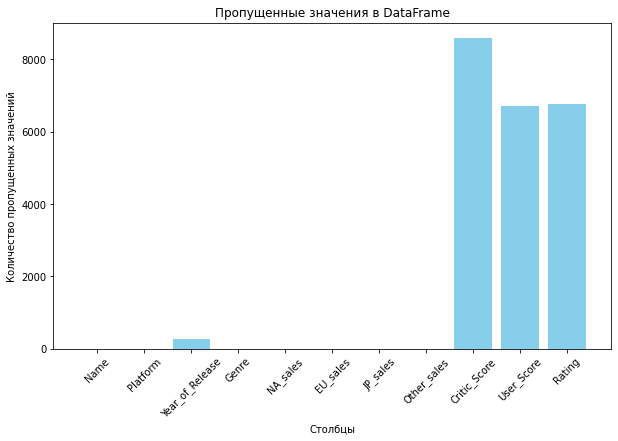

In [19]:
# Построем  гистограмму пропущенных значений в каждом столбце DataFrame 
missing_values_count=games.isnull().sum()
plt.figure(figsize=(10, 6))
plt.bar(missing_values_count.index, missing_values_count.values, color='skyblue')
plt.xlabel('Столбцы')
plt.ylabel('Количество пропущенных значений')
plt.title('Пропущенные значения в DataFrame')
plt.xticks(rotation=45)
plt.show()

In [20]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [21]:
# Проверим на наличие дубликатов в DataFrame
games.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16710    False
16711    False
16712    False
16713    False
16714    False
Length: 16715, dtype: bool

In [22]:
#Проверим наличие неявных дубликатов с использованием subset  для 'Name', 'Platform'
games[games.duplicated(subset=['Name', 'Platform'])]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


Здесь мы видим несколько проблем:

- В строке с индексом 14244 пропущены значения для названия игры, платформы, жанра, оценок критиков и пользователей, а также рейтинга ESRB. Это может потенциально создать проблемы при анализе данных, так как эти записи могут быть неполными или искаженными.
- В строке с индексом 4127 пропущено значение для года выпуска игры. Это также может быть проблемой при анализе данных, так как год выпуска может быть важным фактором при анализе трендов в индустрии игр.

Самый простой способ -это удалить неявные дубликаты, но попробуем найти год через уникальные значения и заменить на медиану.

In [23]:
#Проверим на каких платформах выходила игра с данным названием
platforms = games.loc[games['Name'] == 'Need for Speed: Most Wanted', 'Platform'].unique()
display("Платформы для игры 'Need for Speed: Most Wanted':", platforms)

"Платформы для игры 'Need for Speed: Most Wanted':"

array(['PS2', 'PS3', 'X360', 'XB', 'PSV', 'GC', 'PC', 'WiiU', 'DS', 'GBA'],
      dtype=object)

Это широкий спектр платформ, на которых игра была выпущена, что показывает ее популярность и мультиплатформенность. Удалять неявные дублиаты в 1591, 11715 не будем.

Удалим неявные дубликаты в строках 14244,потому что в ней много пропусков и сложно заполнить данные без названия игры только по году и платформе. Строку 4127 оставляем без изменений.

In [24]:
#Создадим копию DataFrame без удаления дубликатов  в строке 14244 
games_duplicate = games.copy()

# Выводим количество строк и столбцов в новом DataFrame
display("Количество строк и столбцов в новом DataFrame без удаления дубликатов:", games_duplicate.shape)

'Количество строк и столбцов в новом DataFrame без удаления дубликатов:'

(16715, 11)

In [25]:
#Удалим неявные дубликаты в строке 14244
games = games.drop(index=[14244])

In [26]:
#Проверим количество строк
display(games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16714 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16714 non-null  object 
 2   Year_of_Release  16445 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16714 non-null  float64
 5   EU_sales         16714 non-null  float64
 6   JP_sales         16714 non-null  float64
 7   Other_sales      16714 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


None

In [27]:
#Проверим наличие пропусков после работы с дубликатами
games.isnull().sum()

Name                  1
Platform              0
Year_of_Release     269
Genre                 1
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8577
User_Score         6700
Rating             6765
dtype: int64

### Вывод первого шага.


- Year_of_Release - имеет 269 пропусков, что составляет 1.61% от всех строк, поэтому данные пропуски оставляем без изменений или удаляем. Изменим тип данных с float64 на int, так данные в году имеют целое значение.
- Critic_Score - имеет 38.4% пропусков. Некорректно заменять пропуски на "0", так как рейтинг может быть "0" и при замене пропусков на "0" данные будут недостоверными. Такая же ситуация с заменой на средние значения. Проверим данные, которые заполнены, исходя что оценка критиков определяется максимум до значения 100. Проверим возможность замены данных на рейтинг, который не входит в применяемый интервал оценки. Значение необходимо привести к нижнему регистру.
- User_Score - имеет 30.0% пропусков, удалять данные пропуки некорректно, так как данные могут быть не достоверными. Проверим данные, которые заполнены, исходя что оценка пользователей определяется максимум до значения  10. Проверим возможность замены данных на рейтинг, который не входит в применяемый интервал оценки. Тип данных object, необходимо изменить на int. Значение необходимо привести к нижнему регистру.
- Rating (рейтинг от организации ESRB) - имеет 30.3% пропусков, данный рейтинг используется с 1994 года, каждую игру относят к одной из шести возрастных категорий, под которую игра подпадает. В Соединенных Штатах Америки пользуются оценками организации ESRB, большая часть Европы использует оценки PEGI, в Японии пользуются оценками CERO. Возможно производитель не планировал выходить на рынок США, поэтому заменим   пропуски на "unknown". Тип данных object, изменять нет необходимости. Значение необходимо привести к нижнему регистру.
- Все наименования столбцов необходимо привести к нижнему регистру.
- Дубликаты отсутствуют

Общий анализ DataFrame:
- DataFrame содержит 16715 строк и 11 столбцов.
- Name: Название игры. Имеется 16713 непропущенных значений типа object.
- Platform: Платформа, на которой выпущена игра. Все значения заполнены, тип данных object.
- Year_of_Release: Год выпуска игры. Есть пропущенные значения, тип данных float64.
- Genre: Жанр игры. Имеется 16713 непропущенных значений, тип данных object.
- NA_sales: Продажи в Северной Америке (в миллионах копий). Все значения заполнены, тип данных float64.
- EU_sales: Продажи в Европе (в миллионах копий). Все значения заполнены, тип данных float64.
- JP_sales: Продажи в Японии (в миллионах копий). Все значения заполнены, тип данных float64.

- Данные содержат большое количество "0" значений в столбцах NA_sales, EU_sales, JP_sales, Other_sales части минимальных продаж и нижней квартили, отличаются средние показатели между NA_sales, EU_sales, которые значительно выше продаж JP_sales, Other_sales. Максимальные продажи так же в регионах NA_sales, EU_sales выше чем в JP_sales, Other_sales.

- Год выпуска игр: средний год выпуска игр составляет около 2006 года, что может указывать на то, что большинство игр в данных были выпущены в период с начала 2000-х до середины 2010-х годов.
- Продажи в различных регионах: средние продажи в Северной Америке (NA_sales) кажутся выше, чем в Европе (EU_sales), Японии (JP_sales) и других регионах (Other_sales). Это может указывать на то, что игры в целом пользуются большей популярностью в Северной Америке.
- Оценки критиков: средний балл критиков составляет около 68.97, что может указывать на то, что в целом критики довольно благосклонно относятся к играм в данных. Однако стандартное отклонение относительно высокое, что может означать, что оценки критиков варьируются в значительной степени.

Анализ пропусков:
- Name и Genre: пропуски составляют всего 0.01%, что говорит о том, что эти столбцы почти полностью заполнены.  Посмотрим можно ли сохранить строки без удаления. 
- Platform, NA_sales, EU_sales, JP_sales, Other_sales: В этих столбцах пропусков вообще нет, что свидетельствует о полноте данных по платформам и объемам продаж в различных регионах.
- Year_of_Release: имеет 269 пропусков, что составляет 1.61% от всех строк, поэтому данные пропуски оставляем без изменений или удаляем. Это может быть связано с тем, что год выпуска игры не всегда известен или может быть утерян в данных. Изменим тип данных с float64 на int, так данные в году имеют целое значение.
- Critic_Score: имеет 38.4% пропусков. Некорректно заменять пропуски на "0", так как рейтинг может быть "0" и при замене пропусков на "0" данные будут недостоверными. Такая же ситуация с заменой на средние значения. Проверим данные, которые заполнены, исходя что оценка критиков определяется максимум до значения 100. Проверим возможность замены данных на рейтинг, который не входит в применяемый интервал оценки. Значение необходимо привести к нижнему регистру.
- User_Score: имеет 30.0% пропусков, удалять данные пропуки некорректно, так как данные могут быть не достоверными. Проверим данные, которые заполнены, исходя что оценка пользователей определяется максимум до значения  10. Проверим возможность замены данных на рейтинг, который не входит в применяемый интервал оценки. Тип данных object, необходимо изменить на int. Значение необходимо привести к нижнему регистру.
- Rating (рейтинг от организации ESRB): имеет 30.3% пропусков, данный рейтинг используется с 1994 года, каждую игру относят к одной из шести возрастных категорий, под которую игра подпадает. В Соединенных Штатах Америки пользуются оценками организации ESRB, большая часть Европы использует оценки PEGI, в Японии пользуются оценками CERO. Возможно производитель не планировал выходить на рынок США, поэтому заменим   пропуски на "unknown". Тип данных object, изменять нет необходимости. Значение необходимо привести к нижнему регистру.
- Все наименования столбцов необходимо привести к нижнему регистру.
- В целом, пропуски в столбцах Year_of_Release, Critic_Score, User_Score и Rating могут повлиять на анализ данных, и возможно потребуется дополнительная обработка данных.

Анализ дубликатов:
- В строке с индексом 14244 пропущены значения для названия игры, платформы, жанра, оценок критиков и пользователей, а также рейтинга ESRB. Это может потенциально создать проблемы при анализе данных, так как эти записи могут быть неполными или искаженными.
- В строке с индексом 4127 пропущено значение для года выпуска игры. Это также может быть проблемой при анализе данных, так как год выпуска может быть важным фактором при анализе трендов в индустрии игр.
- В итоге: удалять дубликаты в  1591, 11715 не будем, так как по названию игры можно сказать что она имеет широкий спектр платформ, на которых игра была выпущена, что показывает ее популярность и мультиплатформенность. 
- Удалили неявные дубликаты в строке 14244,потому что в ней много пропусков и сложно заполнить данные без названия игры только по году и платформе. 
- В строке 4127 неявные дубликаты не удаляем.
- Создали копию DataFrame без удаления дубликатов  в строке 14244 - games_duplicate 
    

## Шаг. Подготовка данных.

### Заменим названия столбцов (приведем к нижнему регистру).

In [28]:
# Приведение значений всех столбцов к нижнему регистру
games.columns = games.columns.str.lower()

In [29]:
#Проверим замену регистра 
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему. Обработаем пропуски.

**name**

Так как столбец "name" имеет 2 два пропуска, удалим.

In [30]:
#Посмотрим на данные пропуска столбца "name"
missing_names = games[games['name'].isnull()]
display(missing_names)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


- Данные по продажам в строке 659 по  na_sales значительно выше среднего значения по столбцу, то есть есть выбросы.
- Так как выбросы могут исказить статистические показатели, такие как среднее значение, стандартное отклонение и медиана, что может привести к неправильным выводам о распределении данных и характере их вариации, данную строку можем  удалить, соххранить во втором датаырейме без удаления пропусков. Учитываем, что данная строка указывает 1993 год, то есть не актуальный период для нашего анализа.

Проведем замену пропусков на new_name в двух строках 659 и 14244 в столбце "name" во втором  DataFrame games_duplicate.

In [31]:
#Проведем замену в DataFrame - games_duplicate
games_duplicate.loc[659, 'Name'] = 'new_name'
games_duplicate.loc[14244, 'Name'] = 'new_name'

In [32]:
# Приведение значений всех столбцов к нижнему регистру в DataFrame - games_duplicate
games_duplicate.columns = games_duplicate.columns.str.lower()

In [33]:
# Выводим данные в строке 659 после замены пропуска в DataFrame - games_duplicate
display(games_duplicate.loc[659])
# Выводим данные в строке 14244 после замены пропуска DataFrame - games_duplicate
display(games_duplicate.loc[14244])

name               new_name
platform                GEN
year_of_release      1993.0
genre                   NaN
na_sales               1.78
eu_sales               0.53
jp_sales                0.0
other_sales            0.08
critic_score            NaN
user_score              NaN
rating                  NaN
Name: 659, dtype: object

name               new_name
platform                GEN
year_of_release      1993.0
genre                   NaN
na_sales                0.0
eu_sales                0.0
jp_sales               0.03
other_sales             0.0
critic_score            NaN
user_score              NaN
rating                  NaN
Name: 14244, dtype: object

In [34]:
#Проведем удаление в DataFrame - games
games = games.dropna(subset=['name'])

In [35]:
#Проверим удаление в DataFrame - games
display(games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


None

Пропуски в столбце 'name' отсутствуют.

In [36]:
#Проверим количество строк в в DataFrame games
shape = games.shape
display("Количество строк и столбцов в DataFrame games:", shape)

'Количество строк и столбцов в DataFrame games:'

(16713, 11)

In [37]:
#Проверим количество строк в  DataFrame games_duplicate. Строки сохранены.
shape = games_duplicate.shape
display("Количество строк и столбцов в DataFrame games_duplicate:", shape)

'Количество строк и столбцов в DataFrame games_duplicate:'

(16715, 11)

**year_of_release**

Так как столбец "year_of_release" имеет 1,61% пропусков, можем провести их удаление. Так как год имеет целое значение, а не десятичное, изменим тип данных с float64 на int.

In [38]:
#Для изменения типа данных сначала удалим пропуски в столбце "year_of_release"
games = games.dropna(subset=['year_of_release'])

Посмотрим на данные столбца для возможной замены пропусков.

In [39]:
#Посмотрим на данные пропуска столбца "year_of_release" в DataFrame games_duplicate
missing_year = games_duplicate[games_duplicate['year_of_release'].isnull()]
display(missing_year)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Предположим, что дата в названии соответстует году запуска платформы.

In [40]:
#Найдем год выпуска игры "Madden NFL 2004"
madden_year = games_duplicate.query("name == 'Madden NFL 2004'")['year_of_release'].values[0]
display("Год выпуска игры 'Madden NFL 2004':", madden_year)

"Год выпуска игры 'Madden NFL 2004':"

nan

In [41]:
#Найдем год выпуска игры 'FIFA Soccer 2004'
fifa_soccer = games_duplicate.query("name == 'FIFA Soccer 2004'")['year_of_release'].values[0]
display("Год выпуска игры 'FIFA Soccer 2004':", fifa_soccer)

"Год выпуска игры 'FIFA Soccer 2004':"

nan

In [42]:
#Найдем год выпуска игры 'wwe Smackdown vs. Raw 2006'
wwe_smackdown = games_duplicate.query("name == 'wwe Smackdown vs. Raw 2006'")['year_of_release'].values[0]
display("wwe Smackdown vs. Raw 2006':", wwe_smackdown)

"wwe Smackdown vs. Raw 2006':"

nan

Предположение не подтвердилось.

Из открытых источников найдено: Madden NFL 2004	PS2 имеет год выпуска 2003,FIFA Soccer 2004	PS2 - 2003, LEGO Batman: The Videogame	Wii - 2008, wwe Smackdown vs. Raw 2006	PS2 - 2004, Space Invaders	2600	- 1980, PDC World Championship Darts 2008	PSP - 2008, Freaky Flyers	GC - 2001, Inversion	PC	- 2012, Hakuouki: Shinsengumi Kitan	PS3 - 2008, Virtua Quest	GC - 2004, Rock Band X360 год выпуска 2009, Frogger's Adventures: Temple of the Frog GBA год выпуска 2001, LEGO Indiana Jones: The Original Adventures	Wii год выпуска 2008, Call of Duty 3	Wii	год выпуска 2006, Rock Band	Wii	год выпуска 2009, Homeworld Remastered Collection	PC	 год выпуска 2015, Shorts	DS	год выпуска 2009, AKB1/48: Idol to Guam de Koishitara...	X360 год выпуска 2010, Brothers in Arms: Furious 4	X360	год выпуска 2012, Agarest Senki: Re-appearance	PS3	год выпуска 2008.

In [43]:
# Создаем словарь с данными о годах выпуска для указанных игр
year_mapping = {
    'Madden NFL 2004': 2003,
    'FIFA Soccer 2004': 2003,
    'LEGO Batman: The Videogame': 2008,
    'wwe Smackdown vs. Raw 2006': 2004,
    'Space Invaders': 1980,
    'PDC World Championship Darts 2008': 2008,
    'Freaky Flyers': 2001,
    'Inversion': 2012,
    'Hakuouki: Shinsengumi Kitan': 2008,
    'Virtua Quest': 2004,
    'Rock Band': 2009,
    "Frogger's Adventures: Temple of the Frog": 2001,
    'LEGO Indiana Jones: The Original Adventures': 2008,
    'Call of Duty 3': 2006,
    'Rock Band': 2009,
    'Homeworld Remastered Collection': 2015,
    'Shorts': 2009,
    'AKB1/48: Idol to Guam de Koishitara...': 2010,
    'Brothers in Arms: Furious 4': 2012,
    'Agarest Senki: Re-appearance': 2008
}

# Заменим пропуски в столбце "year_of_release" на значения из словаря
games_duplicate['year_of_release'].fillna(games_duplicate['name'].map(year_mapping), inplace=True)

In [44]:
#Проверим количество пропусков во втором DataFrame games_duplicate после замены
missing_year_count = games_duplicate['year_of_release'].isnull().sum()
display("Количество пропусков в столбце 'year_of_release' во втором DataFrame games_duplicate:", missing_year_count)

"Количество пропусков в столбце 'year_of_release' во втором DataFrame games_duplicate:"

244

Процесс замены в ручную очень трудоемкий, поэтому 244 пропуска во втором DataFrame games_duplicate оставляем без изменений. Тип данных не меняем.

In [45]:
display(games_duplicate)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [46]:
#Изменим тип данных в столбце "year_of_release" с float64 на int DataFrame games
games['year_of_release'] = games['year_of_release'].astype(int)

In [47]:
#Проверим замену типа данных DataFrame games
display(games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


None

In [48]:
# Проверим наличие пропусков в столбце 'year_of_release'DataFrame games
missing_values = games['year_of_release'].isnull().sum()
print("Количество пропущенных значений в столбце 'year_of_release' DataFrame games:", missing_values)

Количество пропущенных значений в столбце 'year_of_release' DataFrame games: 0


Провели замену типа данных и удаление пропущенных значений в столбце year_of_release.

Провели замену типа данных и удаление пропущенных значений в столбце year_of_release в DataFrame games, а так же провели замену части пропущенных значений во втором DataFrame games_duplicate, часть пропусков (244) оставили без изменений.
- в первом DataFrame games строк 16444;
- во втором DataFrame games_duplicate  строк 16715.

**user_score**

Так как столбец 'user_score' имеет  тип данных object, а рейтинг определяется в числе с плавающей запятой, то изменим на float. До замены типа данных проанализируем замену пропусков, а так же проанализируем уникальные значения столбца на предмет иных значений.
Так как данные были взяты из открытых источников столбец имеет 30.0% пропусков, возможной причной наличия данных пропусков является ошибка в загрузке данных или нежелание пользователй указывать рейтинг.

In [49]:
#Проанализируем на наличие уникальных значений столбец 'user_score'
display(games['user_score'].unique())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [50]:
#Проверим количество tbd в столбце 'user_score'
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.

То есть помимо пропусков "nan" есть "tbd", которые можем заменить на отличные от рейтинга значения, например "-1".

In [51]:
#Проведем замену "nan" есть "tbd" на "-1".
# Заменим  пропуски на -1
games['user_score'] = games['user_score'].fillna(-1)

# Заменим значения 'tbd' на -1 в столбце 'user_score'
games['user_score'] = games['user_score'].replace('tbd', -1)

In [52]:
#Заменим тип данных object на float  в столбце 'user_score'
games['user_score'] = games['user_score'].astype(float)

In [53]:
#Проверим произведенные замены
# Проверим наличие пропусков в столбце 'user_score'
missing_values_us = games['user_score'].isnull().sum()
print("Количество пропущенных значений в столбце 'user_score':", missing_values_us)

Количество пропущенных значений в столбце 'user_score': 0


In [54]:
#Проверим замену типа данных 
display(games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


None

In [55]:
#Проверим уникальные значения столбца 'user_score' после замены
display(games['user_score'].unique())

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

Провели замену типа данных и замену пропущенных значений,'tbd' на "-1" в столбце "user_score".

Во втором DataFrame games_duplicate пропуски не удаляем.

In [56]:
#Проверим уникальные значения столбца 'user_score' тором DataFrame games_duplicate 
display(games_duplicate ['user_score'].unique())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [57]:
# Заменим значения 'tbd' на -1 в столбце 'user_score' во втором DataFrame games_duplicate, 
#т.к.нужно поменять тип данных для графиков и корреляции
games_duplicate['user_score'] = games_duplicate['user_score'].replace('tbd', -1)

In [58]:
#Заменим тип данных object на float  в столбце 'user_score' во втором DataFrame games_duplicate
games_duplicate['user_score'] = games_duplicate['user_score'].astype(float)

In [59]:
display(games_duplicate.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16471 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


None

- Провели замену типа данных и замену пропущенных значений,'tbd' на "-1" в столбце "user_score" в DataFrame games, во втором DataFrame games_duplicate - 'tbd' заменили на "-1", изменили тип данных. 
- Помним про удаление заглушек при построении графиков и корреляции по первому DataFrame games.

**critic_score**

Так как данные были взяты из открытых источников, столбец "сritic_score"  имеет 38.4% пропусков. Такое количество пропусков может быть связано с ошибками при выгрузке данных,   так же с человеческим фактором.  В связи с большим процентом пропусков их  удаление приведет к искажению данных, поэтму произведем замену пропусков на "-1".

In [60]:
#Проверим уникальные значения столбца 'сritic_score' 
display(games['critic_score'].unique())

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [61]:
# Заменим  пропуски на -1
games['critic_score'] = games['critic_score'].fillna(-1)

In [62]:
# Проверим наличие пропусков в столбце 'user_score' после замены
missing_values_сs = games['critic_score'].isnull().sum()
print("Количество пропущенных значений в столбце 'critic_score':", missing_values_сs)

Количество пропущенных значений в столбце 'critic_score': 0


Провели замену пропущенных значений на "-1", пропуски  в столбце 'critic_score' отсутствуют.

Пропуски во втором DataFrame games_duplicate не меняем.

In [63]:
#Проверим уникальные значения столбца 'сritic_score' во втором DataFrame games_duplicate
display(games_duplicate['critic_score'].unique())

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [64]:
# Преобразование типа данных столбца critic_score в числовой тип
games_duplicate['critic_score'] = games_duplicate['critic_score'].astype(float)

In [65]:
#Проверим замену типа данных
display(games_duplicate.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16471 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


None

- Провели замену пропущенных значений на "-1" в столбце "critic_score" в DataFrame games, во втором DataFrame games_duplicate - изменили тип данных. 
- Помним про удаление заглушек при построении графиков и корреляции в DataFrame games.

**rating**

Так как "rating" имеет 30.3% пропусков, каждую игру относят к одной из шести возрастных категорий, под которую игра подпадает. В Соединенных Штатах Америки пользуются оценками организации ESRB, большая часть Европы использует оценки PEGI, в Японии пользуются оценками CERO. Поэтому  можем заменить пропуски  на "unknown", так как производитель мог не планировать выходить на рынок США. Тип данных object, изменять нет необходимости.

In [66]:
#Проверим наличие уникальных значений в столбце rating
display(games['rating'].unique())

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Исходя из описания рейтинга ESRB, есть следующие категории, которые содержатся в DataFrame
- EC - детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует. 
- E - подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. 
- E10+ - подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. 
- T	- подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. 
- M- подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. 
- AO -	подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности. 
- RP -	категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.
- Первоначально "K-A" - "Kids to Adults".

Таким образом указанную классификацию оставляем без изменений.

In [67]:
# Заменим  пропуски в 'rating'на "unknown"
games['rating'] = games['rating'].fillna('unknown')

In [68]:
#Проверим наличие пропусков в DataFrame
games.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Пропуски обработаны, данные приведены в нужные типы, наименования приведены к нижнему регистру.

Проведем замену пропусков во втором DataFrame games_duplicate.

In [69]:
# Заменим  пропуски в 'rating'на "unknown" во втором DataFrame games_duplicate
games_duplicate['rating'] = games_duplicate['rating'].fillna('unknown')

In [70]:
#Проверим наличие пропусков в DataFrame games_duplicate
games_duplicate.isnull().sum()

name                  0
platform              0
year_of_release     244
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating                0
dtype: int64

**genre в во втором в DataFrame games_duplicate**

In [71]:
#Проверим наличие уникальных значений в столбце genre
display(games_duplicate['genre'].unique())

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [72]:
# Заменим  пропуски в 'genre'на "unknown" в DataFrame games_duplicate
games_duplicate['genre'] = games_duplicate['genre'].fillna('unknown')

In [73]:
#Проверим наличие пропусков в DataFrame games_duplicate
games_duplicate.isnull().sum()

name                  0
platform              0
year_of_release     244
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating                0
dtype: int64

### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец 'sales_total'.

In [74]:
# Суммируем продажи по всем регионам для каждой игры
games['sales_total'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Отобразим обновленный DataFrame
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


Добавим столбец sales_total во втором DataFrame games_duplicate.

In [75]:
# Суммируем продажи по всем регионам для каждой игры для второго DataFrame games_duplicate
games_duplicate['sales_total'] = games_duplicate[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Отобразим обновленный DataFrame
display(games_duplicate.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


Столбец "sales_total" с суммой продаж во всех регионах добавлен.

### Вывод второго шага.

- Пропуски обработаны, данные приведены в нужные типы:
- в  столбце "name" удалили два пропуска;
- в столбце "year_of_release" провели удаление 1,61% пропусков, изменили тип данных с float64 на int, потому что  как год имеет целое значение, а не десятичное;
- в столбце 'user_score' заменили тип данных object на float, так как рейтинг определяется в виде числа с плавающей запятой. Так как данные были взяты из открытых источников столбец имел 30.0% пропусков, возможной причной наличия данных пропусков является ошибка в загрузке данных или в нежелании пользователй указывать рейтинг. Данные столбца содержали абревиатуру "tbd". TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Таким образом, пропуски "nan" и "tbd" заменили на отличное от рейтинга значение "-1".
- столбец "сritic_score" имел 38.4% пропусков. Такое количество пропусков может быть связано с ошибками при выгрузке данных, так же с человеческим фактором. В связи с большим процентом пропусков произвели замену пропусков на отличное от рейтинга значение "-1".
- столбец "rating" имел 30.3% пропусков, большое число которых возможно связано с нежеланем производителя указывать рейтинг ESRB. Пропуски  "nan" заменили на "unknown".

- Столбец "sales_total" с суммой продаж во всех регионах добавлен.
- Наименования приведены к нижнему регистру.


В DataFrame games:
- Пропуски обработаны, данные приведены в нужные типы:
- в  столбце "name" удалили два пропуска;
- в столбце "year_of_release" провели удаление 1,61% пропусков, изменили тип данных с float64 на int, потому что  как год имеет целое значение, а не десятичное;
- в столбце 'user_score' заменили тип данных object на float, так как рейтинг определяется в виде числа с плавающей запятой. Так как данные были взяты из открытых источников столбец имел 30.0% пропусков, возможной причной наличия данных пропусков является ошибка в загрузке данных или в нежелании пользователй указывать рейтинг. Данные столбца содержали абревиатуру "tbd". TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Таким образом, пропуски "nan" и "tbd" заменили на отличное от рейтинга значение "-1".
- столбец "сritic_score" имел 38.4% пропусков. Такое количество пропусков может быть связано с ошибками при выгрузке данных, так же с человеческим фактором. В связи с большим процентом пропусков произвели замену пропусков на отличное от рейтинга значение "-1".
- столбец "rating" имел 30.3% пропусков, большое число которых возможно связано с нежеланем производителя указывать рейтинг ESRB. Пропуски  "nan" заменили на "unknown".

- Столбец "sales_total" с суммой продаж во всех регионах добавлен.
- Наименования приведены к нижнему регистру.

Во втором DataFrame games_duplicate:
- Пропуски обработаны, кроме столбца "year_of_release", данные приведены в нужные типы:
- в  столбце "name" два пропуска заменили на "new_name";
- в столбце "year_of_release" провели замену вручную 25 пропусков, тип данных оставили без изменений, оставили 244 пропуска;
- в столбце 'user_score' "сritic_score" пропуски не меняли для построения графиков и расчета корреляций, кроме tbd и типа данных.
- столбец "rating" имел 30.3% пропусков, большое число которых возможно связано с нежеланем производителя указывать рейтинг ESRB. Пропуски  "nan" заменили на "unknown".
- столбец "genre" имел 2 пропуска, заменили на "unknown".
- Столбец "sales_total" с суммой продаж во всех регионах добавлен.
- Наименования приведены к нижнему регистру.


## Шаг. Проведем исследовательский анализ данных.

### Посмотрим, сколько игр выпускалось в разные годы. Оценим важность  данных за все периоды.

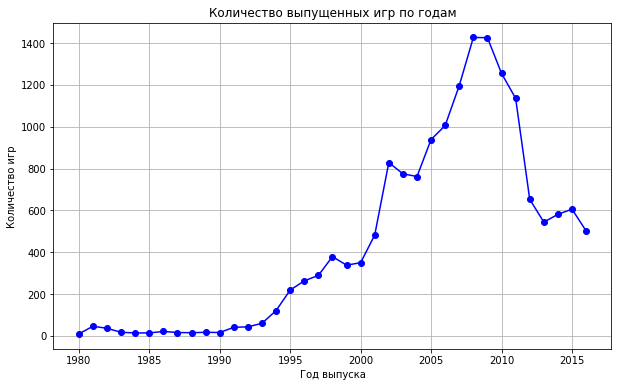

In [76]:
# Группировка данных по году выпуска игр и подсчет количества игр
games_year = games.groupby('year_of_release')['name'].count()

# Построение графика
plt.figure(figsize=(10, 6))
games_year.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.grid(True)
plt.show()


В коде агрегация по count() считает количество записей в каждой группе по году выпуска игры. Однако это не учитывает случаи, когда одна и та же игра выпускается на разных платформах в одном и том же году.

Для получения истинного количества игр по годам, учитывая каждую игру только один раз независимо от платформы, нужно учитывать дубликаты. Подход с поиском дубликатов по подмножеству (год выпуска и название игры) и удаление дубликатов, кроме первой записи, является хорошим способом получения точного количества игр по годам.

Таким образом, чтобы получить истинное количество игр по годам, следует:
- Найти дубликаты по подмножеству (год выпуска и название игры).
- Удалить дубликаты, оставив только первую запись каждой игры.
- После этого можно провести агрегацию по году выпуска игры, используя метод count().

In [77]:
#Найдем дубликаты по году выпуска и названию игры
duplicate_subset = games.duplicated(subset=['year_of_release', 'name'], keep=False)

#Отфильтруем DataFrame, оставив только строки с дубликатами
duplicates = games[duplicate_subset]
display(duplicates)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,-1.0,-1.0,unknown,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,unknown,0.01


In [78]:
# Удаляем дубликаты, оставляя только первую запись каждой игры
games_unique = games.drop_duplicates(subset=['name'], keep='first')

display(games_unique.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11426 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             11426 non-null  object 
 1   platform         11426 non-null  object 
 2   year_of_release  11426 non-null  int64  
 3   genre            11426 non-null  object 
 4   na_sales         11426 non-null  float64
 5   eu_sales         11426 non-null  float64
 6   jp_sales         11426 non-null  float64
 7   other_sales      11426 non-null  float64
 8   critic_score     11426 non-null  float64
 9   user_score       11426 non-null  float64
 10  rating           11426 non-null  object 
 11  sales_total      11426 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.1+ MB


None

year_of_release
1980      8
1981     43
1982     33
1983     16
1984     13
1985     13
1986     21
1987     15
1988     11
1989     14
1990     14
1991     40
1992     37
1993     58
1994    112
1995    200
1996    247
1997    268
1998    347
1999    293
2000    300
2001    410
2002    573
2003    491
2004    521
2005    617
2006    729
2007    838
2008    987
2009    957
2010    862
2011    750
2012    406
2013    293
2014    279
2015    331
2016    279
Name: name, dtype: int64

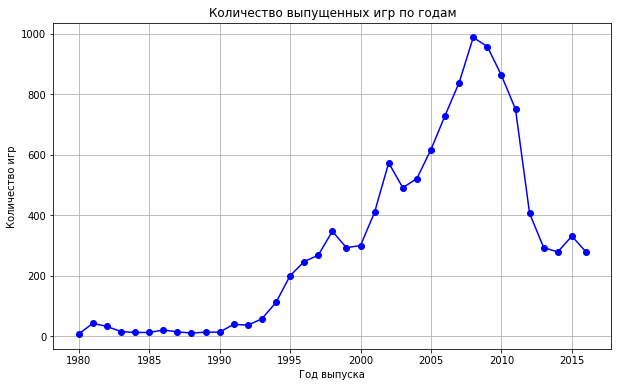

In [79]:
# Проводим агрегацию по году выпуска игры и подсчитываем количество игр
games_year_count = games_unique.groupby('year_of_release')['name'].count()

# Выводим результат агрегации
display(games_year_count)

# Построим график
plt.figure(figsize=(10, 6))
games_year_count.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.grid(True)
plt.show()

In [80]:
#Найдем дубликаты по году выпуска и названию игры во втором DataFrame games_duplicate
duplicate_subset_two = games_duplicate.duplicated(subset=['year_of_release', 'name'], keep=False)

#Отфильтруем DataFrame, оставив только строки с дубликатами
duplicates_two = games_duplicate[duplicate_subset_two]

In [81]:
# Удаляем дубликаты, оставляя только первую запись каждой игры во втором DataFrame games_duplicate
games_unique_two = games_duplicate.drop_duplicates(subset=['name'], keep='first')

year_of_release
1980.0      9
1981.0     43
1982.0     33
1983.0     16
1984.0     13
1985.0     13
1986.0     21
1987.0     15
1988.0     11
1989.0     14
1990.0     14
1991.0     40
1992.0     37
1993.0     59
1994.0    111
1995.0    200
1996.0    247
1997.0    268
1998.0    347
1999.0    293
2000.0    300
2001.0    411
2002.0    565
2003.0    489
2004.0    523
2005.0    615
2006.0    723
2007.0    837
2008.0    988
2009.0    958
2010.0    859
2011.0    747
2012.0    405
2013.0    293
2014.0    279
2015.0    332
2016.0    279
Name: name, dtype: int64

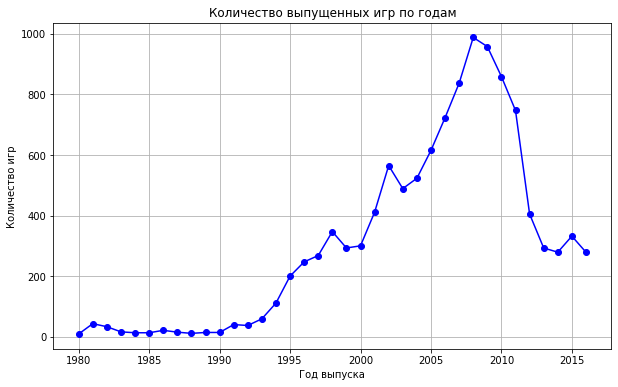

In [82]:
# Проводим агрегацию по году выпуска игры и подсчитываем количество игр во втором DataFrame games_duplicate
games_year_count_two = games_unique_two.groupby('year_of_release')['name'].count()

#Выводим результат агрегации
display(games_year_count_two)
# Построим график
plt.figure(figsize=(10, 6))
games_year_count_two.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.grid(True)
plt.show()

- С 1980 года до 2007 очевиден рост в количестве игр, резкий скачок произошел в 2002 году, после 2008 года количество игр значительно снизилось.
- В 1977 году появилась Atari 2600 — первая успешная приставка с играми на картриджах объёмом в 32 Килобайта. На этой приставке запускались такие игры, как: Pac-Man, Space Invaders, Mario Bros, Donkey Kong, Frogger, Combat, Kaboom! и многие другие. Чуть позже приставки начали производить Nintendo, Sega и Sony, ставшими крупнейшими разработчиками игр в мире.
- 1990-е годы были ознаменованы заметными инновациями в компьютерных играх, по этой причине отмечается начало роста до 1998 года. Основными достижениями называют переход от растровой графики к полностью полигональному 3D, снижение популярности аркадных игр и появление нескольких новых жанров - шутер от первого лица, стратегия в реальном времени и MMO.
- В 1998 году отмечаем небольшое снижение до 2000 года и именно здесь одновременно с однопользовательскими играми, стали появляться и игры, рассчитанные на несколько человек, играющих по сети. Первые онлайн-игры были текстовыми приключениями, доступными только нескольким подключённым друг к другу компьютерам. Однако, чем дальше развивались технологии, тем дешевле становились, а значит скоро подключение к интернету могли себе позволить почти все игроки. Так, в конце 90х появились сетевые игры Ultima Online, Lineage, Starcraft и Counter-Strike, навсегда войдя в историю видеоигр.
- Первой популярной MMO (Massive Multiplayer Game) стала World of Warcraft от компании Blizzard, вышедшая в 2004 г. Именно в этом году отмечаем рост коичества вывущенных игр. На пике популярности в игре было зарегистрировано более 12 миллионов подписчиков, день за днём исследовавших мир игры. Из ММО позже развился жанр MOBA (Multiplayer Online Battle Arena), где акцент сместился с исследования на короткие сражения небольших команд соперников.
- В 2008 - 2009 годах видим приостановдение роста. Это можно объяснить, что  количество выпускаемых игр значительно уменьшилось, в то время как их качество — если полагаться на метрики Metacritic, — увеличилось. Эти показатели слегка разнятся в зависимости от того, какой год брать, так как у каждой из компаний были свои слишком хорошие (или, наоборот, слишком плохие) игры, которые повлияли на общий зачёт.
- В 2007 году компания Apple представила первый iPhone, а в следующем году — магазин приложений App Store. Не являясь ни первым «смартфоном», ни пионером в области цифровых платформ, экосистема Apple получила широкую популярность среди независимых разработчиков и принесла компании огромные деньги. Это также помогло мобильному телефону стать самой популярной игровой системой в мире. Данный факт мог оказать влияние на количество выпускаемых игр, потому что хотя первые мобильные игры не представляли собой ничего особенного, их дешевизна и доступность в сочетании с быстрыми сроками разработки сделали их весьма популярными. Стратегии маркетинга и монетизации этих игр существенно изменились, когда компания Apple, в числе прочих, одобрила покупку приложений (часто называемую микротранзакциями). Это положило начало эре доходной модели «freemium»: предлагать игру бесплатно, но стимулировать игроков тратить деньги на внутриигровые расходные материалы.

Данные на графике показывают актуальную ситуацию с развитием игр, но для анализа в рамках поставленной задачи не имеет смысла брать период до 1994 года, потому что после этого периода начался рост выпуска игр.


### Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построим распределение по годам. Посмотрим за какой характерный срок появляются новые и исчезают старые платформы.

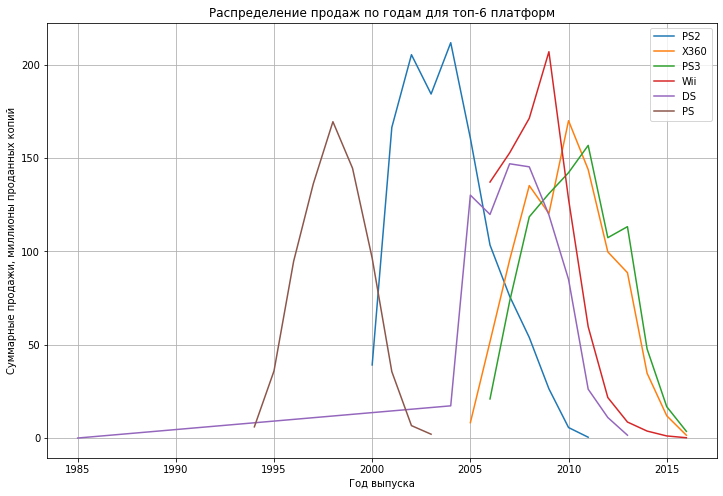

In [83]:
#Сгруппируем данные по платформам и суммируем продажи
platform_sales = games.groupby('platform')['sales_total'].sum()

# Выберим платформы с наибольшими суммарными продажами
top_platforms = platform_sales.nlargest(6).index

#Отфильтруем данные по выбранным платформам
top_platforms_sales = games[games['platform'].isin(top_platforms)]

#Построим распределения продаж по годам для каждой платформы
plt.figure(figsize=(12, 8))
for platform in top_platforms:
    platform_data = top_platforms_sales[top_platforms_sales['platform'] == platform]
    platform_data.groupby('year_of_release')['sales_total'].sum().plot(label=platform)

plt.title('Распределение продаж по годам для топ-6 платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи, миллионы проданных копий')
plt.legend()
plt.grid(True)
plt.show()

In [84]:
# Фильтрация DataFrame по платформе DS
ds_platform = games[games['platform'] == 'DS']

# Вывод уникальных значений столбца "year_of_release" для платформы DS
display(ds_platform['year_of_release'].unique())

array([2006, 2005, 2010, 2009, 2004, 2007, 2012, 2008, 2011, 2013, 1985])

Из свободных источников: В 1983 году компания Nintendo выпустила в Японии свою первую 8-битную игровую приставку Family Computer (Famicom) и, как оказалось, самую успешную в то время — система в итоге заняла 90 % японского рынка. В 1985 году в США приставка вышла под названием Nintendo Entertainment System (NES). По прошествии нескольких лет после выхода NES в Америке, конкурентов у приставки в Новом Свете практически не осталось. NES была абсолютным лидером продаж. В июне 2004 года, на внутрикорпоративном брифинге, Сатору Ивата объявил о том, что компания работает над абсолютно новой системой под кодовым названием «Revolution».
Таким образом, выход новой игры (приложения) показывали изменение продаж.

- На графике очевидны лидеры прожаж: PS2, Wii, X360, PS3, DS, PS. 
- Срок жизни PS2 с 2000 до 2011, то есть 11 лет.
- Срок жизни Wii с 2007 по 2016, то есть 10 лет.
- Срок жизни X360 с 2005 по 2016, то есть 11 лет.
- Срок жизни PS3 с 2006 по 2016, то есть 10 лет.
- Срок жизни DS вышла в 1985, с 2004 виден рост популярности до  2013, то есть 9 лет.
- Срок жизни PS с 1994 по 2003, то есть 9 лет.

Таким образом средний срок жизни топовых платформ составил 10 лет.

In [85]:
#Проверим данные по топовым платформам
games.groupby('platform')['sales_total'].sum().to_frame('sales_total').sort_values(by='sales_total', ascending=False).head(10)

,sales_total
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Возьмем в анализ 6 топовых платформ, по которым высокие продажи.

In [86]:
#Проверим срок жизни платформ.
temp = (games.loc[:,['year_of_release', 'platform']]
        .drop_duplicates()
        .pivot_table(index=['platform'], values='year_of_release', aggfunc='count')
       )
temp

,year_of_release
platform,
2600,10
3DO,2
3DS,6
DC,7
DS,11
GB,13
GBA,8
GC,7
GEN,5


Уточним итог:
- Срок жизни PS2 - 12 лет.
- Срок жизни Wii  - 11 лет.
- Срок жизни X360 - 12 лет.
- Срок жизни PS3  - 11 лет.
- Срок жизни DS - 7 лет.

In [87]:
#Посмотрим средний срок жизни всех платформ
temp.year_of_release.describe() 

count    31.000000
mean      7.677419
std       5.081910
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: year_of_release, dtype: float64

Средний срок жизни всех платформ составлет 7 лет.

Вычислим средннее количество платформ, которые появляются в год.

In [88]:
#Определим общее количество платформ
total_platforms = temp.shape[0]

#Определим общее количество лет в данных
total_years = games['year_of_release'].nunique()

#Определим количество платформ, появляющихся в среднем за год
platforms_per_year = total_platforms / total_years
print("Среднее количество платформ, появляющихся в год:", platforms_per_year)

Среднее количество платформ, появляющихся в год: 0.8378378378378378


В среднем менее одной платформы появляется каждый год.

### Возьмем данные за соответствующий актуальный период. Актуальный период определим  в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитываем в работе данные за предыдущие годы.

На основании анализа графика предыдущего этапа можно сделать вывод, что актуальным периодом вляется период с 2013 по 2016 годы. Для построения долгосрочной стратегии лучше всего брать период равный двенадцати месяцам, то есть 1 год, но так как у нас много показателей возьмем период в 3 года. 
Для составления прогноза необходима  информация о проданных экземплярах продукции, динамике продаж, объемах, ассортименту. Из этого легко вычленить наиболее популярные модели, отсеять то, что не продается. 

Изменение этого значения говорит о тенденциях развития рынка и недостатках в работе компании, которые при отсутствии реагирования могут привести к проблемам. 

### Определим какие платформы лидируют по продажам, растут или падают.  Выберем несколько потенциально прибыльных платформ.

In [89]:
#Выберем платформы для анализа
platforms_to_analyze = ['PS2', 'Wii', 'X360', 'PS3', 'DS', 'PS']

#Отфильтруем данные только для указанных платформ за период с 2013 по 2016 годы
#filtered_games = games[(games['platform'].isin(platforms_to_analyze)) & (games['year_of_release'] >= 2013) & (games['year_of_release'] <= 2016)]

In [90]:
#Отфильтруем данные только для указанных платформ за период с 2013 по 2016 годы
#Исправленное написание с не более 79 символами в строке
filtered_games = games[(games['platform'].isin(platforms_to_analyze)) & 
                       (games['year_of_release'] >= 2013) & 
                       (games['year_of_release'] <= 2016)]

In [91]:
# Сгруппируем данные по платформам и годам и вычислим суммарные продажи для каждой платформы и каждого года
platform_sales_period = filtered_games.groupby(['platform', 'year_of_release'])['sales_total'].sum().reset_index()

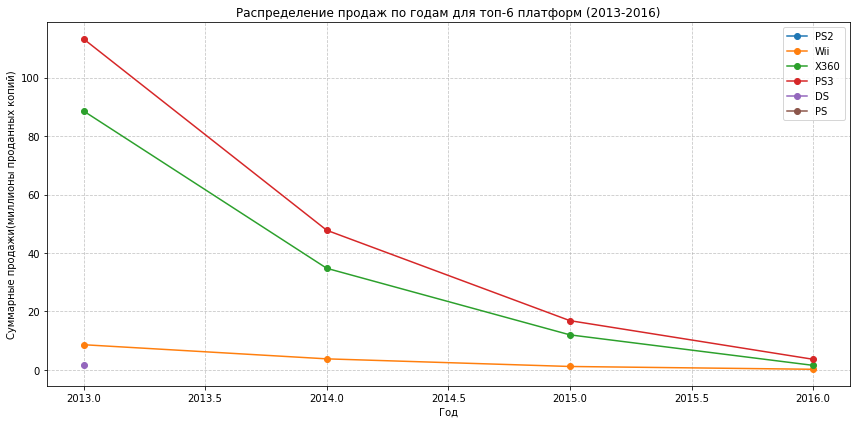

In [92]:
#Построим график суммарных продаж для каждой платформы на протяжении периода с 2013 по 2016 годы
plt.figure(figsize=(12, 6))
for platform in platforms_to_analyze:
    platform_sales = platform_sales_period[platform_sales_period['platform'] == platform]
    plt.plot(platform_sales['year_of_release'], platform_sales['sales_total'], marker='o', label=platform)

plt.title('Распределение продаж по годам для топ-6 платформ (2013-2016)')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи(миллионы проданных копий)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Проверим изменится ли топ платформ за период 2013 - 2016 годы, если фильтрацию проведем только по годам.

In [93]:
#Отфильтруем данные за период с 2013 по 2016 годы для всех платформ
filtered_games_fool = games[(games['year_of_release'] >= 2013) & (games['year_of_release'] <= 2016)]

In [94]:
# Сгруппируем данные по платформам и годам и вычислим суммарные продажи для каждой платформы и каждого года
platform_sales_period_fool = filtered_games_fool.groupby(['platform', 
    'year_of_release'])['sales_total'].sum().reset_index()

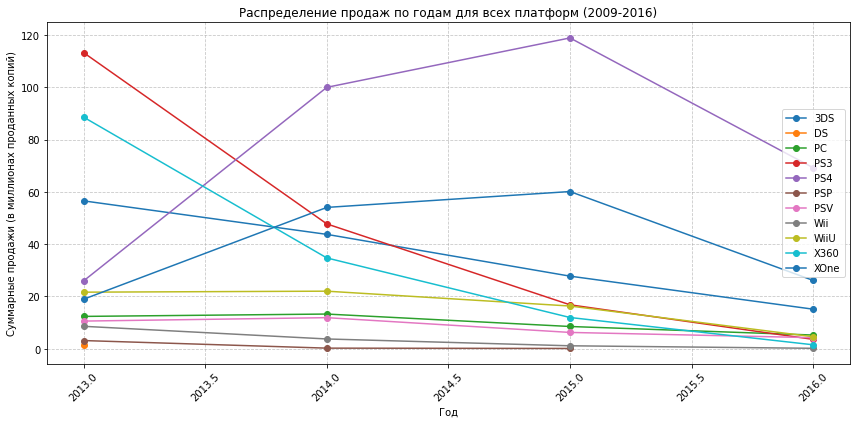

In [95]:
#Построим график суммарных продаж для каждой платформы на протяжении периода с 2013 по 2016 годы
plt.figure(figsize=(12, 6))

for platform in platform_sales_period_fool['platform'].unique():
    platform_data = platform_sales_period_fool[platform_sales_period_fool['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['sales_total'], marker='o', label=platform)

plt.title('Распределение продаж по годам для всех платформ (2009-2016)')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи (в миллионах проданных копий)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='right')
plt.tight_layout()
plt.show()

- Исходя из анализа графика Распределения продаж по годам для всех платформ в период с 2013 года по 2016, можем определить топ лидеров на конец 2016 года: PS4, XOne, 3DS, X360, WiiU, PC. 
- Платформа PS4 была создана в 2013 году и в 2015 году достигла пика роста, платформа XOne была создана в 2013 и имеет пик роста 2015 год, платформа 3DS была создана в 2011 году и пик роста имела в 2013 году. Можно отметить снижение времени жизни платформ в сравнении с прошлым периодом.
- Таким образом, можно сделать вывод, что топ лидеров при анализе графика Распределения продаж по годам топ-6 платформ  топ платформ за весь период изменился,так как  на конец 2016 года он был: PS3,X360,Wii. Суммарные продажи PS3,X360,Wii ниже суммарных продаж платформ, которые были созданы позднее (см.график Распределение продаж по годам для всех платформ (2013-2016)).
- Можно сделать вывод, что сумма продаж всех платформ снижается к 2016 году.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

In [96]:
#Посмотрим описательную статистику по sales_total
games['sales_total'].describe()

count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: sales_total, dtype: float64

Среднее значение суммарных продаж составялет 0.53 млн. проданных копий, максимальные - 82 млн.проданных копий.

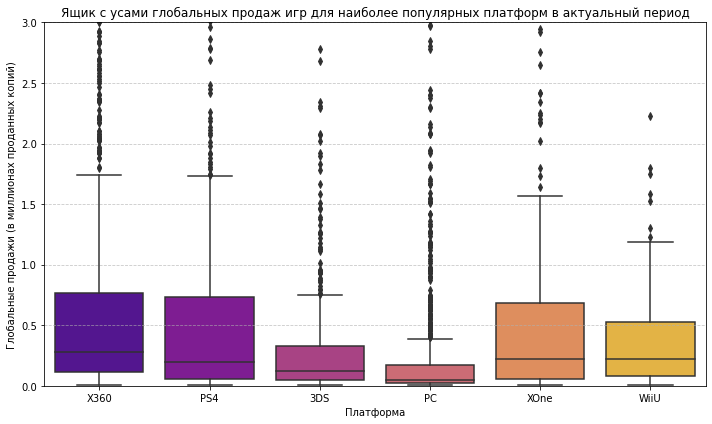

In [97]:
#Составим Ящик с усами по наиболее популярным в актуальный период платформам
top_platforms = ['PS4', 'X360','WiiU', '3DS', 'XOne', "PC"] 
# Фильтруем данные по наиболее популярным платформам 
filtered_top_platforms = games[games['platform'].isin(top_platforms)]

# Строим boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='sales_total', data=filtered_top_platforms, palette='plasma')
plt.title('Ящик с усами глобальных продаж игр для наиболее популярных платформ в актуальный период')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (в миллионах проданных копий)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 3)
plt.tight_layout()
plt.show()

Медиана глобальных продаж по топовым платформам  варьируется от 0.1 до 0.25 млн. проданных копий за платформу.
Верхняя граница предела, за которыми уже определяются аномалии, у двух платформ - PS4 и X360 - на уровне 1.7 млн., у платформ XOne, 3DS, WiiU - от 0.8 до 1.6 млн.проданных копий, cамый низкий покзатель у PC - 0.3 млн.проданных копий.

Уточняем решение с учетом актуального периода. 

In [98]:
#Посмотрим описательную статистику по sales_total через  describe().
filtered_games_fool['sales_total'].describe()

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: sales_total, dtype: float64

Всего в столбце содержится 2233 записи. Среднее значение составляет приблизительно 0.49 миллиона проданных копий, с стандартным отклонением около 1.24. Минимальное значение продаж составляет 0.01 миллиона, а максимальное - 21.05 миллиона. В нижнем квартиле (25%) у нас продажи доходят до 0.03 миллиона, в среднем квартиле (50%) - до 0.11 миллиона, а в верхнем квартиле (75%) - до 0.4 миллиона.

In [99]:
#Составим Ящик с усами по наиболее популярным в актуальный период платформам
top_platforms = ['PS4', 'X360','WiiU', '3DS', 'XOne', "PC"] 
# Фильтруем данные по наиболее популярным платформам 
filtered_top_platforms = filtered_games_fool[filtered_games_fool['platform'].isin(top_platforms)]

In [100]:
#Проверим период 
filtered_top_platforms['year_of_release'].value_counts().sort_index()

2013    281
2014    357
2015    416
2016    378
Name: year_of_release, dtype: int64

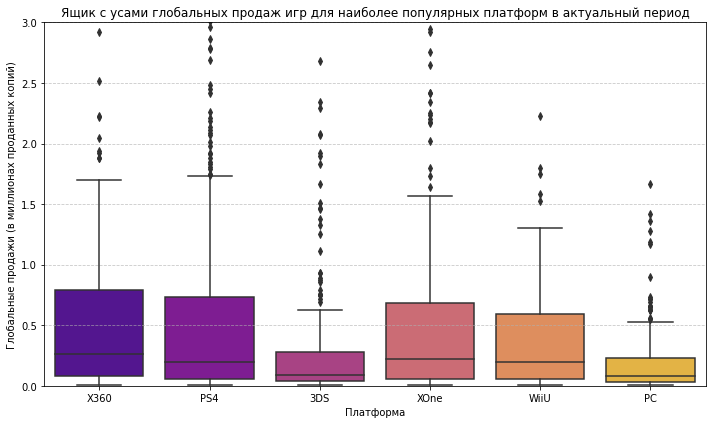

In [101]:
# Строим boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='sales_total', data=filtered_top_platforms, palette='plasma')
plt.title('Ящик с усами глобальных продаж игр для наиболее популярных платформ в актуальный период')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (в миллионах проданных копий)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 3)
plt.tight_layout()
plt.show()

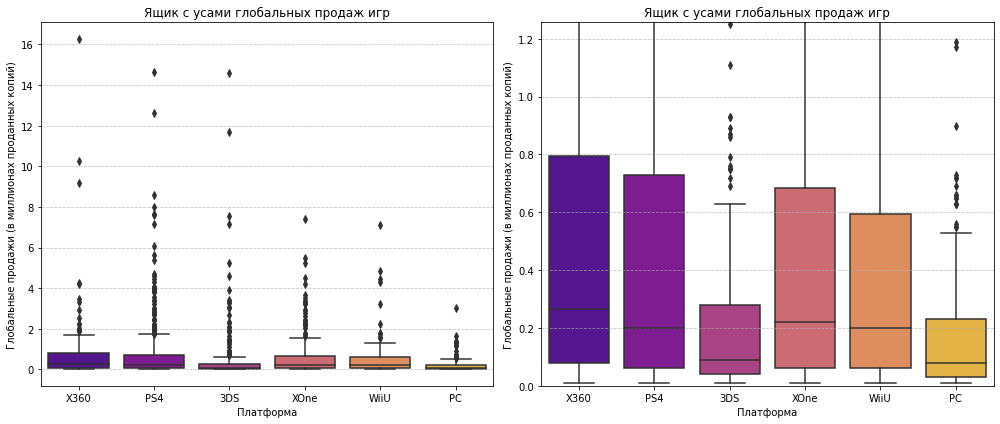

In [102]:
#Построим отдельные графики для лучшей видимости "ящиков"
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='platform', y='sales_total', data=filtered_top_platforms,
            palette='plasma')
plt.title('Ящик с усами глобальных продаж игр')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (в миллионах проданных копий)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.subplot(1, 2, 2)
sns.boxplot(x='platform', y='sales_total', data=filtered_top_platforms,
            palette='plasma')
plt.title('Ящик с усами глобальных продаж игр')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (в миллионах проданных копий)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, filtered_top_platforms['sales_total'].quantile(0.75) + 1.5 * (
        filtered_top_platforms['sales_total'].quantile(0.75) -
        filtered_top_platforms['sales_total'].quantile(0.25)))
plt.tight_layout()
plt.show()



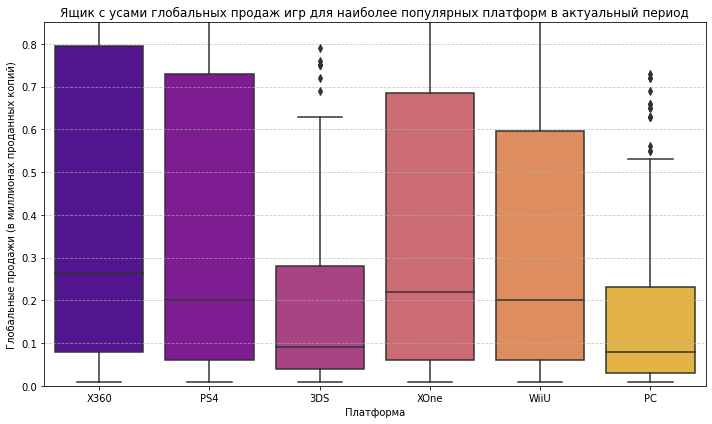

In [103]:
#Построим график с ограничением значений по оси y для более детального рассмотрения "ящиков"
plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='sales_total', data=filtered_top_platforms,
            palette='plasma')
plt.title('Ящик с усами глобальных продаж игр для наиболее популярных '
          'платформ в актуальный период')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (в миллионах проданных копий)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 0.85)
plt.tight_layout()
plt.show()


Медиана глобальных продаж по топовым платформам варьируется от 0.1 до 0.28 млн. проданных копий за платформу. Верхняя граница предела, за которыми уже определяются аномалии, у двух платформ - PS4 и X360 - на уровне 0.8 млн., у платформ XOne, WiiU - от 0.6 до 0.7 млн.проданных копий, cамый низкий покзатель у PC, 3DS - 0.25 до 0.3 млн.проданных копий.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

Выберем одну из популярных платформ, например, PS4, и построим диаграмму рассеяния для отзывов пользователей и критиков по этой платформе. Затем мы вычислим корреляцию между отзывами и продажами для этой платформы.

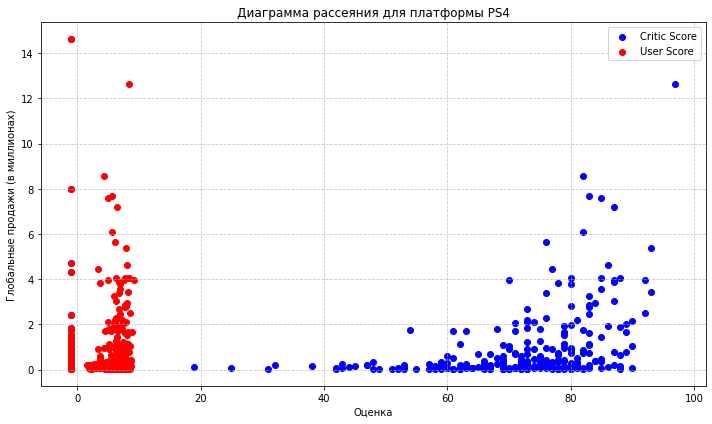

In [104]:
# Выбираем одну из популярных платформ (например, PS4)
platform_ps = 'PS4'
# Фильтруем данные только для выбранной платформы                                          
filtered_platform_ps = games[games['platform'] == platform_ps]

# Строим диаграмму рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(filtered_platform_ps['critic_score'], filtered_platform_ps['sales_total'], color='blue', label='Critic Score')
plt.scatter(filtered_platform_ps['user_score'], filtered_platform_ps['sales_total'], color='red', label='User Score')
plt.title('Диаграмма рассеяния для платформы PS4')
plt.xlabel('Оценка')
plt.ylabel('Глобальные продажи (в миллионах)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

С увеличением рейтинга критиков увеличивается уровень  продажи платформы PS4.
С увеличением оценки пользователей увеличивается количество продаж платформы. Пик роста продаж отслеживается в начале запуска платформы при отсутствии оценок, что объясняется интересом покупателй к новой платформе.


Уточняем решение с учетом актуального периода и DataFrame games_duplicate (заглушки только  на tbd).

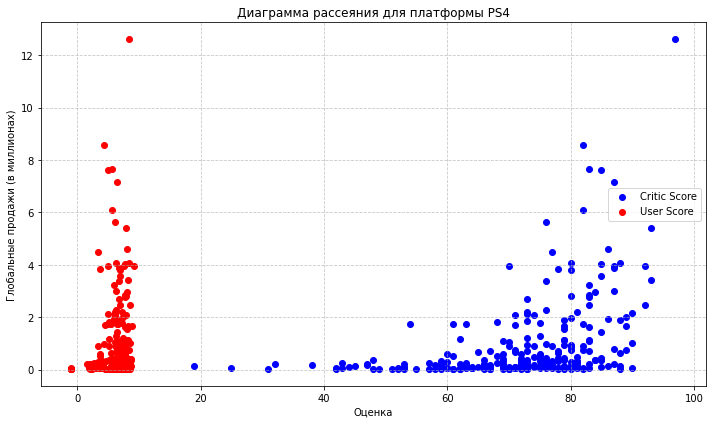

In [105]:
#Используем DataFrame games_duplicate
# Фильтрация данных за период с 2013 по 2016 годы для всех платформ
filtered_games_duplicate = games_duplicate[(games_duplicate['year_of_release'] >= 2013) & 
                                           (games_duplicate['year_of_release'] <= 2016)]

# Выбор одной из популярных платформ (например, PS4)
platform_ps = 'PS4'

# Фильтрация данных только для выбранной платформы
filtered_platform_ps_duplicate = games_duplicate[games_duplicate['platform'] == platform_ps]

# Строим диаграмму рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(filtered_platform_ps_duplicate['critic_score'], filtered_platform_ps_duplicate['sales_total'], 
            color='blue', label='Critic Score')
plt.scatter(filtered_platform_ps_duplicate['user_score'], filtered_platform_ps_duplicate['sales_total'], 
            color='red', label='User Score')
plt.title('Диаграмма рассеяния для платформы PS4')
plt.xlabel('Оценка')
plt.ylabel('Глобальные продажи (в миллионах)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


С увеличением рейтинга критиков увеличивается уровень продажи платформы PS4. С увеличением оценки пользователей увеличивается количество продаж платформы.

In [106]:
# Посчитаем корреляцию для PS4
critic_correlation = filtered_platform_ps['critic_score'].corr(filtered_platform_ps['sales_total'])
user_correlation = filtered_platform_ps['user_score'].corr(filtered_platform_ps['sales_total'])

print(f"Корреляция между оценками критиков и продажами: {critic_correlation}")
print(f"Корреляция между оценками пользователей и продажами: {user_correlation}")


Корреляция между оценками критиков и продажами: 0.22652606614612347
Корреляция между оценками пользователей и продажами: 0.1159614931286009


Корреляция между оценками критиков и продажами составляет около 0.23, что указывает на наличие слабой положительной корреляции между ними. То есть,  более высокие оценки критиков связаны с более высокими продажами игр.

Корреляция между оценками пользователей и продажами составляет около 0.12, что также указывает на наличие слабой положительной корреляции между ними. То есть, более высокие оценки пользователей также связаны с более высокими продажами игр, но в меньшей степени, чем в случае оценок критиков.

In [107]:
# Посчитаем корреляцию для PS4 с методом Спирмена
critic_correlation = filtered_platform_ps_duplicate['critic_score'].corr(
    filtered_platform_ps_duplicate['sales_total'], method='spearman')
user_correlation = filtered_platform_ps_duplicate['user_score'].corr(
    filtered_platform_ps_duplicate['sales_total'], method='spearman')

print(f"Корреляция между оценками критиков и продажами: {critic_correlation}")
print(f"Корреляция между оценками пользователей и продажами: {user_correlation}")


Корреляция между оценками критиков и продажами: 0.508238095708577
Корреляция между оценками пользователей и продажами: 0.03186572600265868


- Корреляция между оценками критиков и продажами составляет примерно 0.51. Это говорит о наличии умеренной положительной корреляции между оценками критиков и объемом продаж игр на платформе PS4. 
- Корреляция между оценками пользователей и продажами составляет примерно 0.03. Это очень слабая положительная корреляция, почти близкая к нулю. Это может указывать на то, что оценки пользователей не сильно влияют на объем продаж игр на платформе PS4, или возможно наличие других факторов, оказывающих большее влияние на решение пользователей о покупке игры.

### Соотнесем выводы с продажами игр на других платформах.

In [108]:
#Отфильтруем топ платформы
platform_top = ['X360', 'WiiU', '3DS', 'XOne', 'PC']
filtered_platform_top = games[games['platform'].isin(platform_top)]
#Проверим фильтрацию
unique_platforms = filtered_platform_top['platform'].unique()
print(unique_platforms)

['X360' '3DS' 'PC' 'XOne' 'WiiU']


In [109]:
#Посмотрим корреляцию по платформам 'X360','WiiU', '3DS', 'XOne', 'PC'

for platform in platform_top:
    filtered_platform_top = games[games['platform'] == platform]
    critic_correlation = filtered_platform_top['critic_score'].corr(filtered_platform_top['sales_total'])
    user_correlation = filtered_platform_top['user_score'].corr(filtered_platform_top['sales_total'])
    print(f"Платформа: {platform}")
    print(f"Корреляция между оценками критиков и продажами: {critic_correlation}")
    print(f"Корреляция между оценками пользователей и продажами: {user_correlation}")
    print()

Платформа: X360
Корреляция между оценками критиков и продажами: 0.31033008701079257
Корреляция между оценками пользователей и продажами: 0.20618255079822181

Платформа: WiiU
Корреляция между оценками критиков и продажами: 0.29716823153556665
Корреляция между оценками пользователей и продажами: 0.2590425110080343

Платформа: 3DS
Корреляция между оценками критиков и продажами: 0.16638104774453372
Корреляция между оценками пользователей и продажами: 0.14642620870246353

Платформа: XOne
Корреляция между оценками критиков и продажами: 0.27378217261702115
Корреляция между оценками пользователей и продажами: 0.12171152458232884

Платформа: PC
Корреляция между оценками критиков и продажами: 0.07889554385845364
Корреляция между оценками пользователей и продажами: 0.008303407623107191



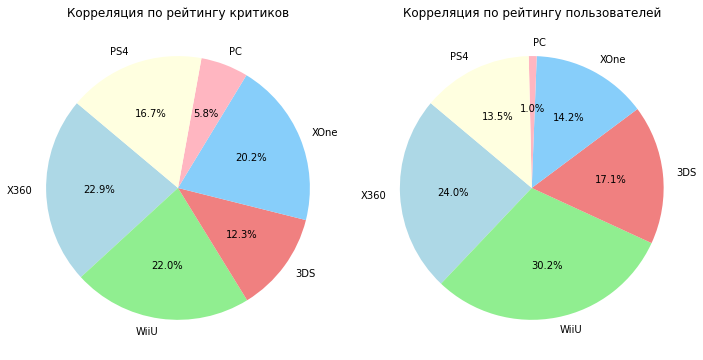

In [110]:
# Данные о корреляции всех топ платформ изобразим на диаграмме
platforms = ['X360', 'WiiU', '3DS', 'XOne', 'PC', 'PS4']
critic_corr = [0.31033008701079257, 0.29716823153556665, 0.16638104774453372, 0.27378217261702115, 0.07889554385845364, 0.22652606614612347]
user_corr = [0.20618255079822181, 0.2590425110080343, 0.14642620870246353, 0.12171152458232884, 0.008303407623107191, 0.1159614931286009]

total_critic_corr = sum(critic_corr)
total_user_corr = sum(user_corr)

critic_corr_normalized = [x / total_critic_corr * 100 for x in critic_corr]
user_corr_normalized = [x / total_user_corr * 100 for x in user_corr]

# Определим цвета
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'lightyellow']

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.pie(critic_corr_normalized, labels=platforms, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Корреляция по рейтингу критиков')

plt.subplot(1, 2, 2)
plt.pie(user_corr_normalized, labels=platforms, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Корреляция по рейтингу пользователей')

plt.tight_layout()
plt.show()


- Анализ коллеряций показал, что продажи завясят больше от оценки критиков, чем оценки пользователей. Тенденция по всем платформам.

- Следует отметить, что у платформы PC в целом слабая зависимость от оценок.

Платформа: PS4
Корреляция между оценками критиков и продажами: 0.22652606614612347
Корреляция между оценками пользователей и продажами: 0.1159614931286009

Платформа: X360
Корреляция между оценками критиков и продажами: 0.31033008701079257
Корреляция между оценками пользователей и продажами: 0.20618255079822181

Платформа: WiiU
Корреляция между оценками критиков и продажами: 0.29716823153556665
Корреляция между оценками пользователей и продажами: 0.2590425110080343

Платформа: 3DS
Корреляция между оценками критиков и продажами: 0.16638104774453372
Корреляция между оценками пользователей и продажами: 0.14642620870246353

Платформа: XOne
Корреляция между оценками критиков и продажами: 0.27378217261702115
Корреляция между оценками пользователей и продажами: 0.12171152458232884

Платформа: PC
Корреляция между оценками критиков и продажами: 0.07889554385845364
Корреляция между оценками пользователей и продажами: 0.008303407623107191

Уточняем решение с учетом актуального периода и DataFrame games_duplicate. 

In [111]:
#Отфильтруем топ платформы
platform_top = ['X360', 'WiiU', '3DS', 'XOne', 'PC']
filtered_platform_top_dup = filtered_games_duplicate [filtered_games_duplicate ['platform'].isin(platform_top)]
#Проверим фильтрацию
unique_platforms_dup = filtered_platform_top_dup['platform'].unique()
print(unique_platforms_dup)

['X360' '3DS' 'XOne' 'WiiU' 'PC']


In [112]:
#Посмотрим корреляцию по платформам 'X360','WiiU', '3DS', 'XOne', 'PC'

for platform in platform_top:
    filtered_platform_top = filtered_games_duplicate[filtered_games_duplicate['platform'] == platform]
    critic_correlation = filtered_platform_top['critic_score'].corr(filtered_platform_top['sales_total'])
    user_correlation = filtered_platform_top['user_score'].corr(filtered_platform_top['sales_total'])
    print(f"Платформа: {platform}")
    print(f"Корреляция между оценками критиков и продажами: {critic_correlation}")
    print(f"Корреляция между оценками пользователей и продажами: {user_correlation}")
    print()

Платформа: X360
Корреляция между оценками критиков и продажами: 0.3503445460228664
Корреляция между оценками пользователей и продажами: 0.066455498930194

Платформа: WiiU
Корреляция между оценками критиков и продажами: 0.3764149065423912
Корреляция между оценками пользователей и продажами: 0.3452907772284938

Платформа: 3DS
Корреляция между оценками критиков и продажами: 0.3570566142288103
Корреляция между оценками пользователей и продажами: 0.3313996952552132

Платформа: XOne
Корреляция между оценками критиков и продажами: 0.4169983280084017
Корреляция между оценками пользователей и продажами: 0.08525772912713797

Платформа: PC
Корреляция между оценками критиков и продажами: 0.1911630831181771
Корреляция между оценками пользователей и продажами: -0.019221959845480023



Исходя из представленных данных, можно сделать следующие выводы:

- Оценки критиков демонстрируют прямую, средне-слабую корреляцию с объемами продаж игр для платформ X360, WiiU и 3DS, а также для XOne и PC. Это означает, что чем выше оценка критиков, тем выше вероятность увеличения продаж игр, однако влияние этого фактора не является определяющим и объемы продаж могут зависеть от других факторов.
- Оценки пользователей не демонстрируют значимой корреляции с объемами продаж для всех платформ. Это говорит о том, что мнение пользователей о игре не имеет существенного влияния на ее коммерческий успех, и другие факторы, возможно, более значимы для привлечения покупателей.
- Таким образом, анализ показывает, что оценки критиков могут в некоторой степени влиять на продажи игр, но мнение пользователей не играет такой же роли и не имеет значимой корреляции с объемами продаж.

### Посмотрим на общее распределение игр по жанрам. Оценим самые прибыльные жанры. Определим есть ли жанры с высокими и низкими продажами.

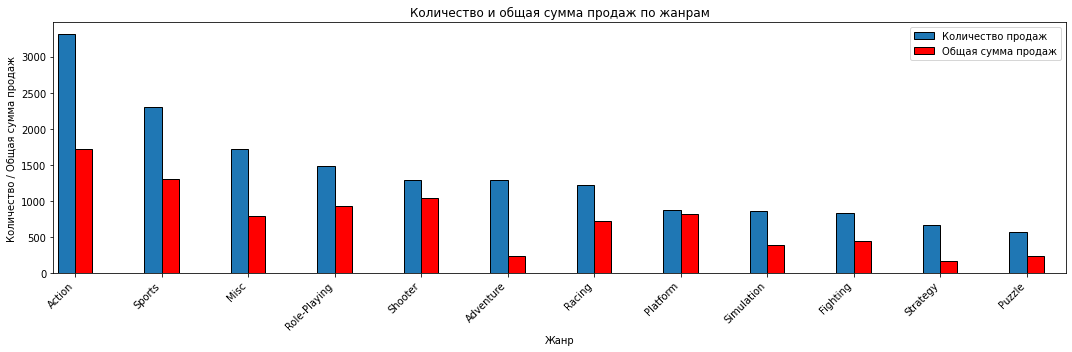

In [113]:
#Построим столбчатую диаграмму для визуализации количества продаж и общей суммы продаж по жанрам

ax = plt.gca()
pivot = games.groupby('genre').agg({'name': 'count', 'sales_total': 'sum'}).sort_values(by='name', ascending=False)

plot1 = pivot['name']
plot1.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, position=1)

plot2 = pivot['sales_total']
plot2.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='red', position=0)

ax.set_xlabel('Жанр')
ax.set_ylabel('Количество / Общая сумма продаж')
ax.legend(['Количество продаж', 'Общая сумма продаж'])


plt.title('Количество и общая сумма продаж по жанрам')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [114]:
#Проверим данные по жанрам
most_popular_genre = games.groupby('genre').agg({'name':'count'}).reset_index()
most_popular_genre.sort_values(by='name', ascending=False).head(10)

,genre,name
0,Action,3307
10,Sports,2306
3,Misc,1721
7,Role-Playing,1481
8,Shooter,1296
1,Adventure,1293
6,Racing,1226
4,Platform,878
9,Simulation,857
2,Fighting,837


- Среди платфом по количеству лидирует жанр Action, после него  Sports, Misc, Role-Playing. 
- Примерно равное количество жанров Shooter, Adventure и Racing. 
- Общая сумма продаж жанров Action и   Sports примерно одинаковая, хотя жанра Action больше по количеству продаж.
- Общая сумма продаж жанра Shooter чуть меньше жанра Sports.
- Общая сумма продаж жанров Role-Playing, Racing, Platform примерно равна, хотя количество продаж Racing ниже.
- Продажи жанров Platform, Simulation, Fighting практически равны, хотя общая сумма продаж жанра Platform выше.

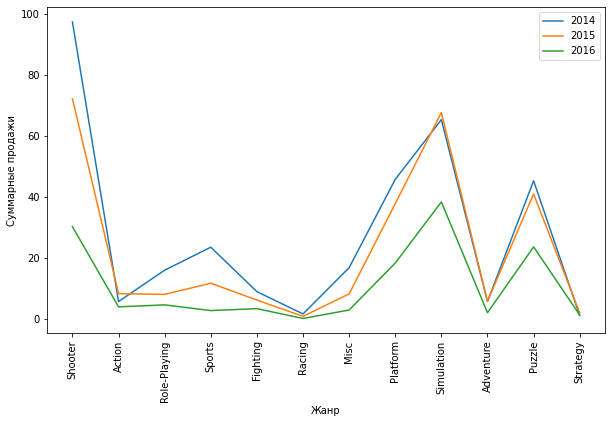

In [115]:
#Построим график в разрезе 3 лет
filtered_games_fool = filtered_games_fool[(filtered_games_fool['year_of_release'].isin([2014, 2015, 2016])) & (filtered_games_fool['genre'] != 'PSP')]
genres = filtered_games_fool['genre'].unique()

plt.figure(figsize=(10, 6))
for year in [2014, 2015, 2016]:
    sales_by_year = filtered_games_fool[filtered_games_fool['year_of_release'] == year].groupby('genre')['sales_total'].sum()
    plt.plot(genres, sales_by_year, label=year)

plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Можно отметить, что с 2014 года по 2016 сумма продаж жанров значительно снизилась. В 2016 году сумма продаж Shooter, Simulation, Puzzle значительно выше остальных жанров.Топовые жанры по сумме продаж в 2014-2016 годах: Shooters, Simulation, Sports, Platform, Action, Strategy, Puzzle. 

Уточняем решение с учетом актуального периода и DataFrame games_duplicate. 

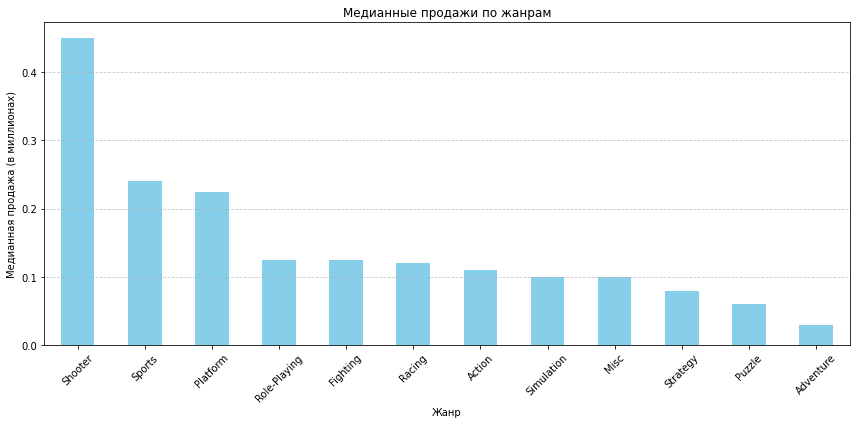

In [116]:
# Вычисляем медианные продажи по жанрам
genre_median_sales = filtered_games_duplicate.groupby('genre')['sales_total'].median().sort_values(ascending=False)

# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
genre_median_sales.plot(kind='bar', color='skyblue')
plt.title('Медианные продажи по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Медианная продажа (в миллионах)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [117]:
#Проверим данные по жанрам
genre_median_sales_df = genre_median_sales.reset_index()
genre_median_sales_df.columns = ['Жанр', 'Медианная продажа (в миллионах)']

# Вывод таблицы медианных продаж по жанрам
display(genre_median_sales_df)

,Жанр,Медианная продажа (в миллионах)
0,Shooter,0.450
1,Sports,0.240
2,Platform,0.225
3,Role-Playing,0.125
4,Fighting,0.125
5,Racing,0.120
6,Action,0.110
7,Simulation,0.100
8,Misc,0.100
9,Strategy,0.080


#### - Жанр Shooter имеет наибольшую медианную продажу (0.450 миллиона копий), что указывает на его высокую популярность среди игроков.
- За жанром Shooter следуют Sports (0.240 миллиона копий) и Platform (0.225 миллиона копий), что также указывает на их относительную популярность.
- Жанры Role-Playing и Fighting имеют одинаковые медианные продажи (0.125 миллиона копий), что указывает на их сопоставимую популярность.
- Остальные жанры, такие как Racing, Action, Simulation, Misc, Strategy, Puzzle и Adventure, имеют более низкие медианные продажи, составляющие от 0.060 до 0.100 миллиона копий. Это может указывать на их менее выраженную популярность среди игроков по сравнению с более популярными жанрами.

### Вывод третьего шага.

- С 1980 года до 2007 очевиден рост в количестве игр, резкий скачок произошел в 2002 году, после 2008 года количество игр значительно снизилось.
- Основыне лидеры прожаж (Топ-6): PS2, Wii, X360, PS3, DS, PS.
- Анализируя динамику продаж платформы DS (1985-2013) отмечаем, что выход новой игры (приложения) показывали изменение продаж.
- Средний срок жизни Топ-6 платформ составил 10 лет.
- Средний срок жизни всех платформ составлет 7 лет.
- В среднем менее одной платформы появляется каждый год.
- Актуальным периодом вляется период с 2013 по 2016 годы. Для построения долгосрочной стратегии лучше всего брать период равный двенадцати месяцам, но так как у нас много показателей возьмем период в 3 года. Для составления прогноза необходима информация о проданных экземплярах продукции, динамике продаж, объемах, ассортименту. Из этого легко вычленить наиболее популярные модели, отсеять то, что не продается. Изменение этого значения говорит о тенденциях развития рынка и недостатках в работе компании, которые при отсутствии реагирования могут привести к проблемам.
- В период с 2013 года по 2016 топ лидеров на конец 2016 года: PS4, XOne, 3DS, X360, WiiU, PC. 
- Платформа PS4 была создана в 2013 году и в 2015 году достигла пика роста, платформа XOne была создана в 2013 и имеет пик роста 2015 год, платформа 3DS была создана в 2011 году и пик роста имела в 2013 году. Можно отметить снижение времени жизни платформ в сравнении с прошлым периодом.
- Сумма продаж всех платформ снижается к 2016 году.
- Медиана глобальных продаж по топовым платформам варьируется от 0.1 до 0.28 млн. проданных копий за платформу. Верхняя граница предела, за которыми уже определяются аномалии, у двух платформ - PS4 и X360 - на уровне 0.8 млн., у платформ XOne, WiiU - от 0.6 до 0.7 млн.проданных копий, cамый низкий покзатель у PC, 3DS - 0.25 до 0.3 млн.проданных копий.
- С увеличением рейтинга критиков увеличивается уровень продажи платформы PS4. С увеличением оценки пользователей увеличивается количество продаж платформы.

- Оценки критиков демонстрируют прямую, средне-слабую корреляцию с объемами продаж игр для платформ X360, WiiU и 3DS, а также для XOne и PC. Это означает, что чем выше оценка критиков, тем выше вероятность увеличения продаж игр, однако влияние этого фактора не является определяющим и объемы продаж могут зависеть от других факторов.
- Оценки пользователей не демонстрируют значимой корреляции с объемами продаж для всех платформ. Это говорит о том, что мнение пользователей о игре не имеет существенного влияния на ее коммерческий успех, и другие факторы, возможно, более значимы для привлечения покупателей.
- Таким образом, анализ показывает, что оценки критиков могут в некоторой степени влиять на продажи игр, но мнение пользователей не играет такой же роли и не имеет значимой корреляции с объемами продаж.

- Жанр Shooter имеет наибольшую медианную продажу (0.450 миллиона копий), что указывает на его высокую популярность среди игроков.
- За жанром Shooter следуют Sports (0.240 миллиона копий) и Platform (0.225 миллиона копий), что также указывает на их относительную популярность.
- Жанры Role-Playing и Fighting имеют одинаковые медианные продажи (0.125 миллиона копий), что указывает на их сопоставимую популярность.
- Остальные жанры, такие как Racing, Action, Simulation, Misc, Strategy, Puzzle и Adventure, имеют более низкие медианные продажи, составляющие от 0.060 до 0.100 миллиона копий. Это может указывать на их менее выраженную популярность среди игроков по сравнению с более популярными жанрами.

## Шаг. Составим портрет пользователя каждого региона.

### Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Опишем различия в долях продаж.

In [118]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


**Определим различия в долях продаж по популярным платформам**

In [119]:
#Определим долю продаж для каждого региона относительно общего объема продаж для каждой платформы в период 2014 -2016
games_2014_more = games.query('year_of_release >= 2014')

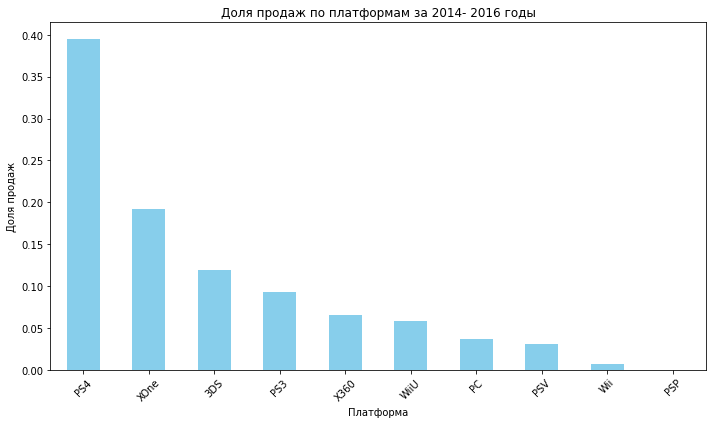

In [120]:
# Группировка данных по платформам и вычисление общих продаж
platform_sales = games_2014_more.groupby('platform')['sales_total'].sum().sort_values(ascending=False)

# Вычисление долей продаж каждой платформы
total_sales = platform_sales.sum()
platform_sales_share = platform_sales / total_sales

# Построение графика для визуализации различий в долях продаж по платформам
plt.figure(figsize=(10, 6))
platform_sales_share.plot(kind='bar', color='skyblue')
plt.title('Доля продаж по платформам за 2014- 2016 годы')
plt.xlabel('Платформа')
plt.ylabel('Доля продаж')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [121]:
#Посмотрим суммарные продажи игр для каждой платформы в различных регионах в период с 2014-2016
top_games_2014 = games_2014_more \
    .pivot_table(['na_sales','eu_sales','jp_sales','other_sales','sales_total'], ['platform'], aggfunc='sum') \
    .sort_values(by='na_sales', ascending=False)

def func(row):
      
    row.eu_sales = round(row.eu_sales/row.sales_total,2)
    row.jp_sales = round(row.jp_sales/row.sales_total,2)
    row.na_sales = round(row.na_sales/row.sales_total,2)
    row.other_sales = round(row.other_sales/row.sales_total,2)
    return row
top_games_2014 = top_games_2014.copy()
top_games_2014

,eu_sales,jp_sales,na_sales,other_sales,sales_total
platform,,,,,
PS4,130.04,15.02,98.61,44.48,288.15
XOne,46.25,0.32,81.27,12.52,140.36
X360,15.49,0.08,28.30,4.35,48.22
3DS,16.12,44.24,22.64,3.68,86.68
PS3,25.54,11.22,22.05,9.37,68.18
WiiU,13.15,7.31,19.36,3.16,42.98
PC,17.97,0.00,7.23,1.85,27.05
PSV,3.53,14.54,2.52,1.81,22.40
Wii,2.59,0.00,2.08,0.40,5.07


**Определим Топ платформ по регионам и построим графики**

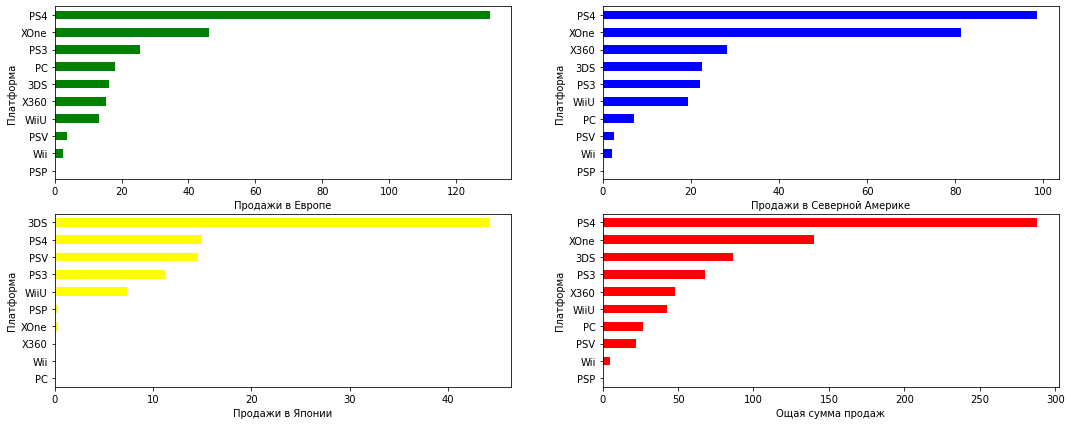

In [122]:
fig, axis = plt.subplots(2,2, figsize=(18,7))

top_games_2014['eu_sales'].sort_values(ascending=True).plot.barh(ax=axis[0, 0], color='green')
axis[0, 0].set_ylabel('Платформа')
axis[0, 0].set_xlabel('Продажи в Европе')

top_games_2014['na_sales'].sort_values(ascending=True).plot.barh(ax=axis[0, 1], color='blue')
axis[0, 1].set_ylabel('Платформа')
axis[0, 1].set_xlabel('Продажи в Северной Америке')

top_games_2014['jp_sales'].sort_values(ascending=True).plot.barh(ax=axis[1, 0], color='yellow')
axis[1, 0].set_ylabel('Платформа')
axis[1, 0].set_xlabel('Продажи в Японии')

top_games_2014['sales_total'].sort_values(ascending=True).plot.barh(ax=axis[1, 1], color='red')
axis[1, 1].set_ylabel('Платформа')
axis[1, 1].set_xlabel('Ощая сумма продаж')

plt.show()

Самые популярные платформы в период с 2014 - 2016 годы:
- Европа: PS4, XOne, PS3, PC, 3DS.
- Япония: 3DS, PS4, PSV, PS3, WiiU.
- Северная Америка: PS4, XOne, Х360, 3DS, PS3.

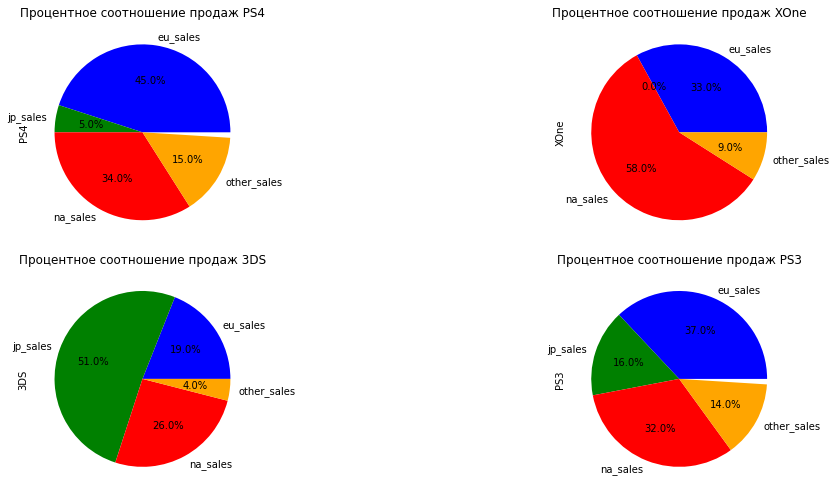

In [123]:
# Построим диаграммы для платформ
top_games_2014_share = top_games_2014.apply(func, axis=1)
fig, axis = plt.subplots(2, 2, figsize=(18, 7))

colors = ['blue', 'green', 'red', 'orange']

# Укажем соответствующие данные для каждой платформы и строим круговые диаграммы
ps4_sales = top_games_2014_share.loc['PS4', ['eu_sales', 'jp_sales', 'na_sales', 'other_sales']]
ps4_sales.plot.pie(ax=axis[0, 0], autopct='%1.1f%%', normalize=False, colors=colors)
axis[0, 0].set_title('Процентное соотношение продаж PS4')

xone_sales = top_games_2014_share.loc['XOne', ['eu_sales', 'jp_sales', 'na_sales', 'other_sales']]
xone_sales.plot.pie(ax=axis[0, 1], autopct='%1.1f%%', normalize=False, colors=colors)
axis[0, 1].set_title('Процентное соотношение продаж XOne')

ds_sales = top_games_2014_share.loc['3DS', ['eu_sales', 'jp_sales', 'na_sales', 'other_sales']]
ds_sales.plot.pie(ax=axis[1, 0], autopct='%1.1f%%', normalize=False, colors=colors)
axis[1, 0].set_title('Процентное соотношение продаж 3DS')

ps3_sales = top_games_2014_share.loc['PS3', ['eu_sales', 'jp_sales', 'na_sales', 'other_sales']]
ps3_sales.plot.pie(ax=axis[1, 1], autopct='%1.1f%%', normalize=False, colors=colors)
axis[1, 1].set_title('Процентное соотношение продаж PS3')

plt.tight_layout()
plt.show()

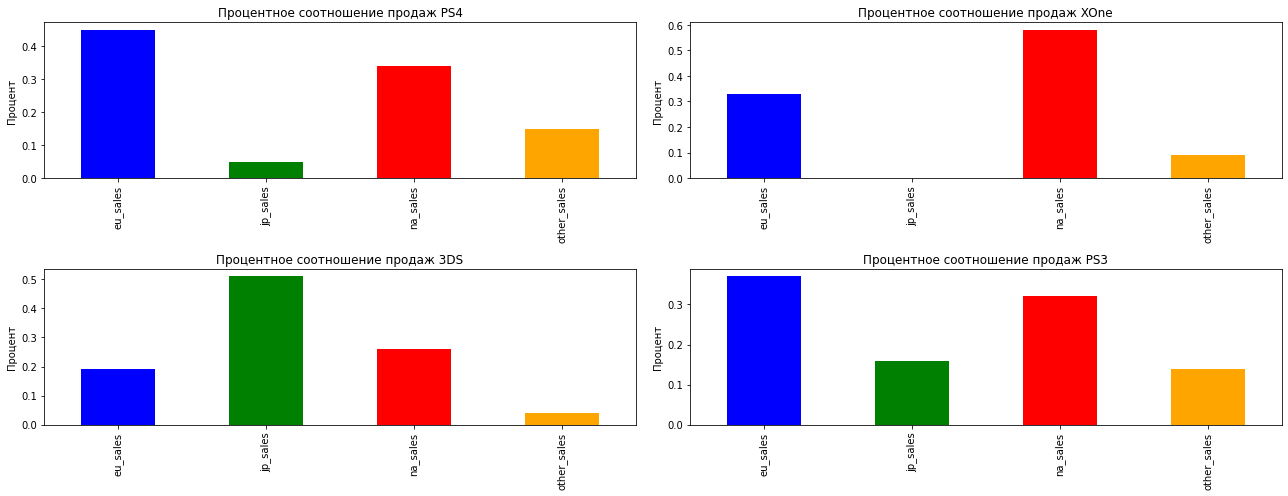

In [124]:
# Построим столбчатую диаграмму для каждой платформы
fig, ax = plt.subplots(2, 2, figsize=(18, 7))

# Для PS4
top_games_2014_share.loc['PS4', ['eu_sales', 'jp_sales', 'na_sales', 'other_sales']] \
    .plot(kind='bar', ax=ax[0, 0], color=colors)
ax[0, 0].set_title('Процентное соотношение продаж PS4')
ax[0, 0].set_ylabel('Процент')

# Для XOne
top_games_2014_share.loc['XOne', ['eu_sales', 'jp_sales', 'na_sales', 'other_sales']] \
    .plot(kind='bar', ax=ax[0, 1], color=colors)
ax[0, 1].set_title('Процентное соотношение продаж XOne')
ax[0, 1].set_ylabel('Процент')

# Для 3DS
top_games_2014_share.loc['3DS', ['eu_sales', 'jp_sales', 'na_sales', 'other_sales']] \
    .plot(kind='bar', ax=ax[1, 0], color=colors)
ax[1, 0].set_title('Процентное соотношение продаж 3DS')
ax[1, 0].set_ylabel('Процент')

# Для PS3
top_games_2014_share.loc['PS3', ['eu_sales', 'jp_sales', 'na_sales', 'other_sales']] \
    .plot(kind='bar', ax=ax[1, 1], color=colors)
ax[1, 1].set_title('Процентное соотношение продаж PS3')
ax[1, 1].set_ylabel('Процент')

plt.tight_layout()
plt.show()



Соотношение доли продаж платформы к общим продажам  по регионам в период 2014-2016 годы:
- PS4 (45.5% в Европе, 34.0% в Северной Америке, 5% в Японии),
- 3DS (51% в Японии, 26.0% в Северной Америке, 19.0% в Европе),
- XOne (58.0% в Северной Америке, 33% в Европе),
- PS3 (37.0% в Европе, 32.0% в Северной Америке, 16% в Японии).

Самая популярная платформа в Европе - PS4 и PS3, в Северной Америке -  XOne, в Японии - 3DS.

Возможные причины данного распределения:

PS4:
- Высокая популярность PS4 в Европе может быть обусловлена успешной маркетинговой кампанией и наличием эксклюзивных игр, которые привлекли внимание европейских игроков. Кроме того, технические характеристики и функции PS4 могли быть привлекательными для европейского рынка.
- Хотя PS4 не является самой популярной платформой в Северной Америке, ее присутствие на рынке все равно заметно благодаря поддержке широкого круга игр и эксклюзивов.
- В Японии PS4 может столкнуться с более сильной конкуренцией от других платформ, таких как Nintendo и Xbox. Это может объяснить более низкую долю PS4 на японском рынке.

3DS:
- 3DS имеет высокую популярность в Японии, возможно, благодаря наличию эксклюзивных игр, которые привлекают японских игроков, а также из-за того, что портативные консоли традиционно популярны в Японии.
- Наличие 3DS в Северной Америке и Европе  может быть обусловлено интересом к японским играм и культуре, а также доступностью и широким выбором игр для этой платформы.

XOne:
- Xbox One пользуется большой популярностью в своей родной  стране (Северной Америке) благодаря мощной маркетинговой поддержке со стороны Microsoft, а также наличию эксклюзивных игр, которые привлекают американских игроков.
- Хотя XOne не так популярен в Европе, как PS4, его присутствие на рынке все равно значительно благодаря поддержке игр и эксклюзивов.

PS3:
- PS3 сохраняет некоторую популярность в Европе, возможно, из-за доступности и широкого выбора игр на этой платформе.
- PS3 также сохраняет некоторую популярность в Северной Америке, хотя она уступает PS4 и Xbox One.
- PS3 имеет низкую долю рынка в Японии, возможно, из-за конкуренции со стороны более популярных платформ.

### Определим для пользователя каждого региона (NA, EU, JP) cамые популярные жанры (топ-5). Поясним разницу.

**Определим самые популярные жанры по регионам в период 2014-2016 годы**

In [125]:
genre_games_2014 = games_2014_more\
            .pivot_table(['na_sales','eu_sales','jp_sales','other_sales','sales_total'], ['genre'], aggfunc='sum')\
            .sort_values(by='na_sales', ascending=False)

def func(row):
      
    row.eu_sales = round(row.eu_sales/row.sales_total,2)
    row.jp_sales = round(row.jp_sales/row.sales_total,2)
    row.na_sales = round(row.na_sales/row.sales_total,2)
    row.other_sales = round(row.other_sales/row.sales_total,2)
    return row

In [126]:
genre_games_2014

,eu_sales,jp_sales,na_sales,other_sales,sales_total
genre,,,,,
Shooter,65.52,4.87,79.02,21.53,170.94
Action,74.68,29.58,72.53,22.57,199.36
Sports,45.73,3.26,46.13,14.36,109.48
Role-Playing,28.17,31.16,33.47,8.64,101.44
Misc,12.86,5.61,15.05,4.03,37.55
Fighting,6.69,6.37,12.43,2.73,28.22
Racing,14.13,1.76,8.74,2.89,27.52
Platform,6.80,2.69,6.79,1.81,18.09
Adventure,6.49,3.60,5.64,1.82,17.55


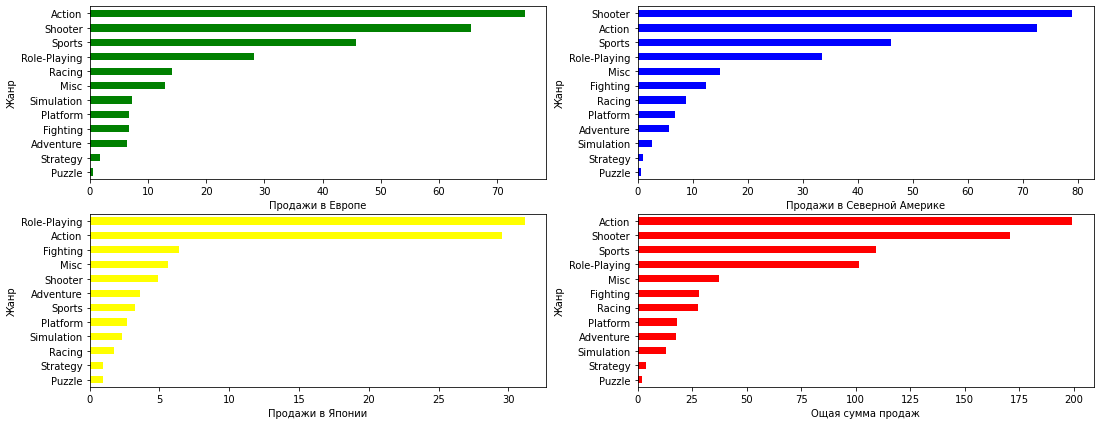

In [127]:
fig, axis = plt.subplots(2,2, figsize=(18,7))

genre_games_2014['eu_sales'].sort_values(ascending=True).plot.barh(ax=axis[0, 0], color='green')
axis[0, 0].set_ylabel('Жанр')
axis[0, 0].set_xlabel('Продажи в Европе')

genre_games_2014['na_sales'].sort_values(ascending=True).plot.barh(ax=axis[0, 1], color='blue')
axis[0, 1].set_ylabel('Жанр')
axis[0, 1].set_xlabel('Продажи в Северной Америке')

genre_games_2014['jp_sales'].sort_values(ascending=True).plot.barh(ax=axis[1, 0], color='yellow')
axis[1, 0].set_ylabel('Жанр')
axis[1, 0].set_xlabel('Продажи в Японии')

genre_games_2014['sales_total'].sort_values(ascending=True).plot.barh(ax=axis[1, 1], color='red')
axis[1, 1].set_ylabel('Жанр')
axis[1, 1].set_xlabel('Ощая сумма продаж')

plt.show()

Самые популярные жанры по регионам в период 2014 - 2016 годы:
- Европа:  Action, Shooter, Sports, Role-Playing, Racing,
- Япония: Role-Playing, Action, Fighting, Misc, Shooter, Adventure,
- Северная Америка: Action, Shooter, Sports, Role-Playing, Misc.
    

Возможные причины данных предпочтений:

Культурные предпочтения:
- В Европе жанры Action, Shooter и Sports могут быть популярны из-за их высокой динамики и возможности играть в многопользовательские режимы. Role-Playing и Racing также популярны в Европе, поскольку они предлагают игрокам возможность погрузиться в разнообразные игровые миры и соревноваться с другими игроками.
- В Японии жанр Role-Playing является одним из самых популярных, поскольку в Японии разработано много культовых RPG-игр с уникальными игровыми механиками и интересными сюжетами. Action также популярен в Японии, возможно, из-за предпочтения к динамичным и аркадным играм. Жанры Fighting, Misc и Shooter также имеют своих поклонников в Японии.
- В Северной Америке игры жанров Action, Shooter и Sports обычно имеют большую популярность из-за их широкой доступности и популярности в культуре. Role-Playing также популярен в этом регионе из-за наличия множества крупных RPG-тайтлов от западных и японских разработчиков. Misc, предположительно, означает разнообразные игры, которые могут быть популярными в Северной Америке из-за разнообразия предпочтений пользователей.

Исторические тенденции:
- В разных регионах могут существовать давние предпочтения по отношению к определенным жанрам, которые могут повлиять на их популярность в будущем. Например, Япония славится своими JRPG, которые имеют долгую историю успеха в этом регионе.

Предложение игр на рынке:
- Наличие определенных игр и франшиз может сильно влиять на популярность жанров в различных регионах. Например, если в определенном регионе выпускается больше игр определенного жанра, пользователи могут проявлять больший интерес к этому жанру.

### Определим для пользователя каждого региона (NA, EU, JP) влияние рейтинга ESRB на продажи в отдельном регионе.

In [128]:
games_2014_more.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,unknown,7.98


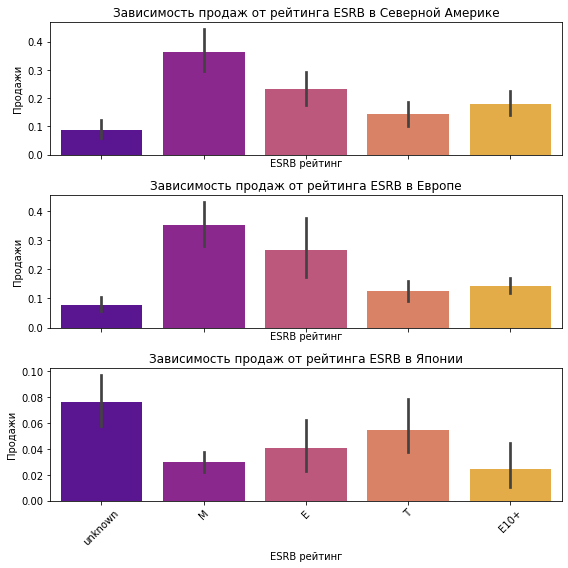

In [129]:
# Создаем подграфики для каждого региона
fig, axes = plt.subplots(3, 1, figsize=(8, 8), sharex=True)

# Зависимость продаж от рейтинга ESRB в Северной Америке
sns.barplot(x='rating', y='na_sales', data=games_2014_more, ax=axes[0], palette='plasma')
axes[0].set_title('Зависимость продаж от рейтинга ESRB в Северной Америке')
axes[0].set_xlabel('ESRB рейтинг')
axes[0].set_ylabel('Продажи')

# Зависимость продаж от рейтинга ESRB в Европе
sns.barplot(x='rating', y='eu_sales', data=games_2014_more, ax=axes[1], palette='plasma')
axes[1].set_title('Зависимость продаж от рейтинга ESRB в Европе')
axes[1].set_xlabel('ESRB рейтинг')
axes[1].set_ylabel('Продажи')

# Зависимость продаж от рейтинга ESRB в Японии
sns.barplot(x='rating', y='jp_sales', data=games_2014_more, ax=axes[2], palette='plasma')
axes[2].set_title('Зависимость продаж от рейтинга ESRB в Японии')
axes[2].set_xlabel('ESRB рейтинг')
axes[2].set_ylabel('Продажи')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Зависимость продаж от рейтинга (классификации)  присутствует, где unknown: "отсутствие рейтинга ESRB", Е: Для всех, M:"> 17 лет", T:"13-19 лет", E10+:">10 лет":
- Япония: отсутствие рейтинга  ESRB влияет на продажи больше, чем при наличии рейтинга, что объясняется применением другого рейтинга в регионе; классификация ESRB "13-19 лет" имеет большее влияние на продажи, чем остальная классификция;
- Европа и Северная Америка: наибольшие продажи в классификации ">17 лет", чуть менее "для всех", что говорит о возрастных характеристиках потребителя.


 Рейтинг ESRB - это американский рейтинг, а в Японии есть своё рейтинговое агентство (CERO). Получается, что Япония страна со своим менталитетом. Японцы в игры-то играют не такие, как весь прочий мир и жанры игр там популярны совсем другие, нежели в остальном мире, да и на рейтинги (не своего агентства) не очень то внимание обращают.
 

### Вывод четвертого шага.

1.Самые популярные платформы в период с 2014 - 2016 годы:
- Европа: PS4, XOne, PS3, PC, 3DS.
- Япония: 3DS, PS4, PSV, PS3, WiiU.
- Северная Америка: PS4, XOne, Х360, 3DS, PS3.

2.Соотношение доли продаж платформы к общим продажам по регионам в период 2014-2016 годы:
- PS4 (45.5% в Европе, 34.0% в Северной Америке, 5% в Японии),
- 3DS (51% в Японии, 26.0% в Северной Америке, 19.0% в Европе),
- XOne (58.0% в Северной Америке, 33% в Европе),
- PS3 (37.0% в Европе, 32.0% в Северной Америке, 16% в Японии).
- Самая популярная платформа в Европе - PS4 и PS3, в Северной Америке - XOne, в Японии - 3DS.

Возможные причины данного распределения:

PS4:
- Высокая популярность PS4 в Европе может быть обусловлена успешной маркетинговой кампанией и наличием эксклюзивных игр, которые привлекли внимание европейских игроков. Кроме того, технические характеристики и функции PS4 могли быть привлекательными для европейского рынка.
- Хотя PS4 не является самой популярной платформой в Северной Америке, ее присутствие на рынке все равно заметно благодаря поддержке широкого круга игр и эксклюзивов.
- В Японии PS4 может столкнуться с более сильной конкуренцией от других платформ, таких как Nintendo и Xbox. Это может объяснить более низкую долю PS4 на японском рынке.

3DS:
- 3DS имеет высокую популярность в Японии, возможно, благодаря наличию эксклюзивных игр, которые привлекают японских игроков, а также из-за того, что портативные консоли традиционно популярны в Японии.
- Наличие 3DS в Северной Америке и Европе может быть обусловлено интересом к японским играм и культуре, а также доступностью и широким выбором игр для этой платформы.

XOne:
- Xbox One пользуется большой популярностью в своей родной стране (Северной Америке) благодаря мощной маркетинговой поддержке со стороны Microsoft, а также наличию эксклюзивных игр, которые привлекают американских игроков.
- Хотя XOne не так популярен в Европе, как PS4, его присутствие на рынке все равно значительно благодаря поддержке игр и эксклюзивов.

PS3:
- PS3 сохраняет некоторую популярность в Европе, возможно, из-за доступности и широкого выбора игр на этой платформе.
- PS3 также сохраняет некоторую популярность в Северной Америке, хотя она уступает PS4 и Xbox One.
- PS3 имеет низкую долю рынка в Японии, возможно, из-за конкуренции со стороны более популярных платформ.    
  
3.Самые популярные жанры по регионам в период 2014 - 2016 годы:
- Европа: Action, Shooter, Sports, Role-Playing, Racing,
- Япония: Role-Playing, Action, Fighting, Misc, Shooter, Adventure,
- Северная Америка: Action, Shooter, Sports, Role-Playing, Misc.

Возможные причины данных предпочтений:

- Культурные предпочтения:
- В Европе жанры Action, Shooter и Sports могут быть популярны из-за их высокой динамики и возможности играть в многопользовательские режимы. Role-Playing и Racing также популярны в Европе, поскольку они предлагают игрокам возможность погрузиться в разнообразные игровые миры и соревноваться с другими игроками.
- В Японии жанр Role-Playing является одним из самых популярных, поскольку в Японии разработано много культовых RPG-игр с уникальными игровыми механиками и интересными сюжетами. Action также популярен в Японии, возможно, из-за предпочтения к динамичным и аркадным играм. Жанры Fighting, Misc и Shooter также имеют своих поклонников в Японии.
- В Северной Америке игры жанров Action, Shooter и Sports обычно имеют большую популярность из-за их широкой доступности и популярности в культуре. Role-Playing также популярен в этом регионе из-за наличия множества крупных RPG-тайтлов от западных и японских разработчиков. Misc, предположительно, означает разнообразные игры, которые могут быть популярными в Северной Америке из-за разнообразия предпочтений пользователей.

- Исторические тенденции:
- В разных регионах могут существовать давние предпочтения по отношению к определенным жанрам, которые могут повлиять на их популярность в будущем. Например, Япония славится своими JRPG, которые имеют долгую историю успеха в этом регионе.

- Предложение игр на рынке:
- Наличие определенных игр и франшиз может сильно влиять на популярность жанров в различных регионах. Например, если в определенном регионе выпускается больше игр определенного жанра, пользователи могут проявлять больший интерес к этому жанру.  
    
4. Зависимость продаж от рейтинга (классификации) присутствует в Европе и Северной Америке.
- Япония: отсутствие рейтинга ESRB влияет на продажи больше, чем при наличии рейтинга, что объясняется применением другого рейтинга в регионе; классификация ESRB "13-19 лет" имеет большее влияние на продажи, чем остальная классификция;
- Европа и Северная Америка: наибольшие продажи в классификации ">17 лет", чуть менее "для всех", что говорит о возрастных характеристиках потребителя.

## шаг. Проверим гипотезы.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- Используем датафрейм games_2014_more (за период 2014-2016 годы)
- Нулевая гипотеза:"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые",
- Альтернативная гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC различаются".
- Для проверки этой гипотезы можно воспользоваться t-тестом для независимых выборок. 

In [130]:
# Выборки оценок пользователей для Xbox One и PC
xbox_ratings = games_2014_more[
    (games_2014_more['platform'] == 'XOne') & 
    (games_2014_more['user_score'] > 0)
]['user_score']
pc_ratings = games_2014_more[
    (games_2014_more['platform'] == 'PC') & 
    (games_2014_more['user_score'] > 0)
]['user_score']

# Проверка гипотезы
stat, p = ttest_ind(xbox_ratings, pc_ratings)
print('t = {}\np-value = {:.10e}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')


t = 1.6285882029651313
p-value = 1.0450507919e-01

Пороговое значение alpha = 0.05


При уровне значимости (alpha) равном 0.05, так как p-value больше alpha, мы не можем отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов для платформ Xbox One и PC. Это означает, что на основе имеющихся данных у нас нет достаточных доказательств, чтобы сказать, что средние пользовательские рейтинги для этих двух платформ различаются.

- В нулевой гипотезе мы предполагаем, что средние пользовательские рейтинги для платформ Xbox One и PC одинаковые. Формально это выражается как: Средний пользовательский рейтинг для Xbox One=Средний пользовательский рейтинг для PC
- Альтернативная гипотеза, утверждает, что средние пользовательские рейтинги для платформ Xbox One и PC, различаются. Формально это выражается как: Средний пользовательский рейтинг для Xbox One≠Средний пользовательский рейтинг для PC,
- Таким образом, когда мы проводим t-тест, мы проверяем, насколько данные противоречат нулевой гипотезе. Если у нас есть достаточно сильные доказательства против нулевой гипотезы (такие как низкое p-value), мы отвергаем ее в пользу альтернативной гипотезы.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

- Используем датафрейм games_2014_more (за период 2014-2016 годы),
- Нулевая гипотеза: "Средние пользовательские рейтинги жанров Action и Sports одинаковые", 
- Альтернативная гипотеза: "Средние пользовательские рейтинги жанров Action и Sports различаются", 
- Для проверки этой гипотезы  можно воспользоваться t-тестом для независимых выборок. 

In [131]:
# Оценки пользователей для жанров Action и Sports
action_ratings = games_2014_more[
    (games_2014_more['genre'] == 'Action') & 
    (games_2014_more['user_score'] > 0)
]['user_score']
sports_ratings = games_2014_more[
    (games_2014_more['genre'] == 'Sports') & 
    (games_2014_more['user_score'] > 0)
]['user_score']

# Проверка гипотезы
stat, p = ttest_ind(action_ratings, sports_ratings)
print('t = {}\np-value = {:.4f}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')


t = 9.425173048948047
p-value = 0.0000

Пороговое значение alpha = 0.05


In [132]:
#Проверим вывод
print(f'Средний пользовательский рейтинг жанров Action: {np.mean(action_ratings)}')
print(f'Средний пользовательский рейтинг жанров Sports: {np.mean(pc_ratings)}')

Средний пользовательский рейтинг жанров Action: 6.760606060606061
Средний пользовательский рейтинг жанров Sports: 6.298360655737705


При уровне значимости (alpha) равном 0.05, так как p-value значительно меньше alpha, мы отвергаем нулевую гипотезу о равенстве средних пользовательских рейтингов для жанров Action и Sports. Это означает, что на основе имеющихся данных у нас есть достаточные доказательства, чтобы сказать, что средние пользовательские рейтинги для этих двух жанров различаются.

- В нулевой гипотезе мы предполагаем, что средние пользовательские рейтинги для жанров Action и Sports одинаковые. Это означает, что нет никаких различий в средних рейтингах между этими двумя жанрами. Формально это выражается как:Средний рейтинг жанра Action=Средний рейтинг жанра Sports,
- Альтернативная гипотеза, утверждает, что средние пользовательские рейтинги для жанров Action и Sports различаются. Это означает, что существует как минимум одно отличие в средних рейтингах между этими двумя жанрами. Формально это выражается как:Средний рейтинг жанра Action≠Средний рейтинг жанра Sports,
- Таким образом, когда мы проводим тест, мы проверяем, насколько данные противоречат нулевой гипотезе. Если у нас есть достаточно сильные доказательства против нулевой гипотезы (такие как низкое p-value), мы отвергаем ее в пользу альтернативной гипотезы.

## шаг. Напишем общий вывод.

1. Анализ общей информации:
- Year_of_Release - имеет 269 пропусков, что составляет 1.61% от всех строк, поэтому данные пропуски оставляем без изменений или удаляем. Изменим тип данных с float64 на int, так данные в году имеют целое значение.
- Critic_Score - имеет 38.4% пропусков. Некорректно заменять пропуски на "0", так как рейтинг может быть "0" и при замене пропусков на "0" данные будут недостоверными. Такая же ситуация с заменой на средние значения. Проверим данные, которые заполнены, исходя что оценка критиков определяется максимум до значения 100. Проверим возможность замены данных на рейтинг, который не входит в применяемый интервал оценки. Значение необходимо привести к нижнему регистру.
- User_Score - имеет 30.0% пропусков, удалять данные пропуки некорректно, так как данные могут быть не достоверными. Проверим данные, которые заполнены, исходя что оценка пользователей определяется максимум до значения 10. Проверим возможность замены данных на рейтинг, который не входит в применяемый интервал оценки. Тип данных object, необходимо изменить на int. Значение необходимо привести к нижнему регистру.
- Rating (рейтинг от организации ESRB) - имеет 30.3% пропусков, данный рейтинг используется с 1994 года, каждую игру относят к одной из шести возрастных категорий, под которую игра подпадает. В Соединенных Штатах Америки пользуются оценками организации ESRB, большая часть Европы использует оценки PEGI, в Японии пользуются оценками CERO. Возможно производитель не планировал выходить на рынок США, поэтому заменим пропуски на "unknown". Тип данных object, изменять нет необходимости. Значение необходимо привести к нижнему регистру.
- Все наименования столбцов необходимо привести к нижнему регистру.
- Дубликаты отсутствуют

2. Подготовка данных:
- Пропуски обработаны, данные приведены в нужные типы:
- в столбце "name" удалили два пропуска;
- в столбце "year_of_release" провели удаление 1,61% пропусков, изменили тип данных с float64 на int, потому что как год имеет целое значение, а не десятичное;
- в столбце 'user_score' заменили тип данных object на float, так как рейтинг определяется в виде числа с плавающей запятой. Так как данные были взяты из открытых источников столбец имел 30.0% пропусков, возможной причной наличия данных пропусков является ошибка в загрузке данных или в нежелании пользователй указывать рейтинг. Данные столбца содержали абревиатуру "tbd". TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Таким образом, пропуски "nan" и "tbd" заменили на отличное от рейтинга значение "-1".
- столбец "сritic_score" имел 38.4% пропусков. Такое количество пропусков может быть связано с ошибками при выгрузке данных, так же с человеческим фактором. В связи с большим процентом пропусков произвели замену пропусков на отличное от рейтинга значение "-1".
- столбец "rating" имел 30.3% пропусков, большое число которых возможно связано с нежеланем производителя указывать рейтинг ESRB. Пропуски "nan" заменили на "unknown".
- Столбец "sales_total" с суммой продаж во всех регионах добавлен.
- Наименования приведены к нижнему регистру.

3.Исследовательский анализ данных:
- С 1980 года до 2007 очевиден рост в количестве игр, резкий скачок произошел в 2002 году, после 2008 года количество игр значительно снизилось.
- Основыне лидеры прожаж (Топ-6): PS2, Wii, X360, PS3, DS, PS.
- Средний срок жизни Топ-6 платформ составил 10 лет.
- Средний срок жизни всех платформ составлет 7 лет.
- В среднем менее одной платформы появляется каждый год.
- Актуальным периодом вляется период с 2013 по 2016 годы. Для построения долгосрочной стратегии лучше всего брать период равный двенадцати месяцам, но так как у нас много показателей возьмем период в 3 года. Для составления прогноза необходима информация о проданных экземплярах продукции, динамике продаж, объемах, ассортименту. 
- В период с 2013 года по 2016 топ лидеров на конец 2016 года: PS4, XOne, 3DS, X360, WiiU, PC.
- Платформа PS4 была создана в 2013 году и в 2015 году достигла пика роста, платформа XOne была создана в 2013 и имеет пик роста 2015 год, платформа 3DS была создана в 2011 году и пик роста имела в 2013 году. Можно отметить снижение времени жизни платформ в сравнении с прошлым периодом.
- Сумма продаж всех платформ снижается к 2016 году.
- Медиана глобальных продаж по топовым платформам варьируется от 0.1 до 0.25 млн. проданных копий за платформу. Верхняя граница предела, за которыми уже определяются аномалии, у двух платформ - PS4 и X360 - на уровне 1.7 млн., у платформ XOne, 3DS, WiiU - от 0.8 до 1.6 млн.проданных копий, cамый низкий покзатель у PC - 0.3 млн.проданных копий.
- С увеличением рейтинга критиков по платформам 'PS4', 'XOne', '3DS', 'X360', 'PC', WiiU увеличивается количество проданных копий, то есть что продажи завясят больше от оценки критиков, чем оценки пользователей. Следует отметить, что у платформы PC в целом слабая зависимость от оценок.
- Среди платфом по количеству лидирует жанр Action, после него Sports, Misc, Role-Playing.
- Примерно равное количество жанров Shooter, Adventure и Racing.
- Общая сумма продаж жанров Action и Sports примерно одинаковая, хотя жанра Action больше по количеству продаж.
- Общая сумма продаж жанра Shooter чуть меньше жанра Sports.
- Общая сумма продаж жанров Role-Playing, Racing, Platform примерно равна, хотя количество продаж Racing ниже.
- Продажи жанров Platform, Simulation, Fighting практически равны, хотя общая сумма продаж жанра Platform выше.
- Можно отметить, что с 2014 года по 2016 сумма продаж жанров значительно снизилась. В 2016 году сумма продаж Shooter, Simulation, Puzzle значительно выше остальных жанров.Топовые жанры по сумме продаж в 2014-2016 годах: Shooters, Simulation, Sports, Platform, Action, Strategy, Puzzle.

4. Портрет пользователя каждого региона:
4.1.Самые популярные платформы в период с 2014 - 2016 годы:
- Европа: PS4, XOne, PS3, PC, 3DS.
- Япония: 3DS, PS4, PSV, PS3, WiiU.
- Северная Америка: PS4, XOne, Х360, 3DS, PS3.
4.2.Соотношение доли продаж платформы к общим продажам по регионам в период 2014-2016 годы:
- PS4 (45.5% в Европе, 34.0% в Северной Америке, 5% в Японии),
- 3DS (51% в Японии, 26.0% в Северной Америке, 19.0% в Европе),
- XOne (58.0% в Северной Америке, 33% в Европе),
- PS3 (37.0% в Европе, 32.0% в Северной Америке, 16% в Японии).
- Самая популярная платформа в Европе - PS4 и PS3, в Северной Америке - XOne, в Японии - 3DS.

Возможные причины данного распределения:
PS4:

Высокая популярность PS4 в Европе может быть обусловлена успешной маркетинговой кампанией и наличием эксклюзивных игр, которые привлекли внимание европейских игроков. Кроме того, технические характеристики и функции PS4 могли быть привлекательными для европейского рынка.
Хотя PS4 не является самой популярной платформой в Северной Америке, ее присутствие на рынке все равно заметно благодаря поддержке широкого круга игр и эксклюзивов.
В Японии PS4 может столкнуться с более сильной конкуренцией от других платформ, таких как Nintendo и Xbox. Это может объяснить более низкую долю PS4 на японском рынке.
3DS:

3DS имеет высокую популярность в Японии, возможно, благодаря наличию эксклюзивных игр, которые привлекают японских игроков, а также из-за того, что портативные консоли традиционно популярны в Японии.
Наличие 3DS в Северной Америке и Европе может быть обусловлено интересом к японским играм и культуре, а также доступностью и широким выбором игр для этой платформы.
XOne:

Xbox One пользуется большой популярностью в своей родной стране (Северной Америке) благодаря мощной маркетинговой поддержке со стороны Microsoft, а также наличию эксклюзивных игр, которые привлекают американских игроков.
Хотя XOne не так популярен в Европе, как PS4, его присутствие на рынке все равно значительно благодаря поддержке игр и эксклюзивов.
PS3:

PS3 сохраняет некоторую популярность в Европе, возможно, из-за доступности и широкого выбора игр на этой платформе.
PS3 также сохраняет некоторую популярность в Северной Америке, хотя она уступает PS4 и Xbox One.
PS3 имеет низкую долю рынка в Японии, возможно, из-за конкуренции со стороны более популярных платформ.

4.3.Самые популярные жанры по регионам в период 2014 - 2016 годы:
- Европа: Action, Shooter, Sports, Role-Playing, Racing,
- Япония: Role-Playing, Action, Fighting, Misc, Shooter, Adventure,
- Северная Америка: Action, Shooter, Sports, Role-Playing, Misc.


Возможные причины данных предпочтений:
- Культурные предпочтения:

В Европе жанры Action, Shooter и Sports могут быть популярны из-за их высокой динамики и возможности играть в многопользовательские режимы. Role-Playing и Racing также популярны в Европе, поскольку они предлагают игрокам возможность погрузиться в разнообразные игровые миры и соревноваться с другими игроками.

В Японии жанр Role-Playing является одним из самых популярных, поскольку в Японии разработано много культовых RPG-игр с уникальными игровыми механиками и интересными сюжетами. Action также популярен в Японии, возможно, из-за предпочтения к динамичным и аркадным играм. Жанры Fighting, Misc и Shooter также имеют своих поклонников в Японии.

В Северной Америке игры жанров Action, Shooter и Sports обычно имеют большую популярность из-за их широкой доступности и популярности в культуре. Role-Playing также популярен в этом регионе из-за наличия множества крупных RPG-тайтлов от западных и японских разработчиков. Misc, предположительно, означает разнообразные игры, которые могут быть популярными в Северной Америке из-за разнообразия предпочтений пользователей.

- Исторические тенденции:
В разных регионах могут существовать давние предпочтения по отношению к определенным жанрам, которые могут повлиять на их популярность в будущем. Например, Япония славится своими JRPG, которые имеют долгую историю успеха в этом регионе.

- Предложение игр на рынке:
Наличие определенных игр и франшиз может сильно влиять на популярность жанров в различных регионах. Например, если в определенном регионе выпускается больше игр определенного жанра, пользователи могут проявлять больший интерес к этому жанру.

4.4.Зависимость продаж от рейтинга (классификации) присутствует в Европе и Северной Америке.
- Япония: отсутствие рейтинга ESRB влияет на продажи больше, чем при наличии рейтинга, что объясняется применением другого рейтинга в регионе; классификация ESRB "13-19 лет" имеет большее влияние на продажи, чем остальная классификция;
- Европа и Северная Америка: наибольшие продажи в классификации ">17 лет", чуть менее "для всех", что говорит о возрастных характеристиках потребителя.

5. Проверка гипотез:

5.1.Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:

- Используем датафрейм games_2014_more (за период 2014-2016 годы)
- Нулевая гипотеза:"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые",
- Альтернативная гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC различаются".
- Для проверки этой гипотезы можно воспользоваться t-тестом для независимых выборок. 

Получаем:
- t = 1.6285882029651313
- p-value = 1.0450507919e-01
- Пороговое значение alpha = 0.05

При уровне значимости (alpha) равном 0.05, так как p-value больше alpha, мы не можем отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов для платформ Xbox One и PC. Это означает, что на основе имеющихся данных у нас нет достаточных доказательств, чтобы сказать, что средние пользовательские рейтинги для этих двух платформ различаются.

В нулевой гипотезе мы предполагаем, что средние пользовательские рейтинги для платформ Xbox One и PC одинаковые. Формально это выражается как: Средний пользовательский рейтинг для Xbox One=Средний пользовательский рейтинг для PC
Альтернативная гипотеза, утверждает, что средние пользовательские рейтинги для платформ Xbox One и PC, различаются. Формально это выражается как: Средний пользовательский рейтинг для Xbox One≠Средний пользовательский рейтинг для PC,
Таким образом, когда мы проводим t-тест, мы проверяем, насколько данные противоречат нулевой гипотезе. Если у нас есть достаточно сильные доказательства против нулевой гипотезы (такие как низкое p-value), мы отвергаем ее в пользу альтернативной гипотезы.

5.2.Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные:

- Используем датафрейм games_2014_more (за период 2014-2016 годы),
- Нулевая гипотеза: "Средние пользовательские рейтинги жанров Action и Sports одинаковые",
- Альтернативная гипотеза: "Средние пользовательские рейтинги жанров Action и Sports различаются",
- Для проверки этой гипотезы можно воспользоваться t-тестом для независимых выборок.

Получаем:
- t = 9.425173048948047
- p-value = 0.0000
- Пороговое значение alpha = 0.05

При уровне значимости (alpha) равном 0.05, так как p-value значительно меньше alpha, мы отвергаем нулевую гипотезу о равенстве средних пользовательских рейтингов для жанров Action и Sports. Это означает, что на основе имеющихся данных у нас есть достаточные доказательства, чтобы сказать, что средние пользовательские рейтинги для этих двух жанров различаются.

В нулевой гипотезе мы предполагаем, что средние пользовательские рейтинги для жанров Action и Sports одинаковые. Это означает, что нет никаких различий в средних рейтингах между этими двумя жанрами. Формально это выражается как:Средний рейтинг жанра Action=Средний рейтинг жанра Sports,
Альтернативная гипотеза, утверждает, что средние пользовательские рейтинги для жанров Action и Sports различаются. Это означает, что существует как минимум одно отличие в средних рейтингах между этими двумя жанрами. Формально это выражается как:Средний рейтинг жанра Action≠Средний рейтинг жанра Sports,
Таким образом, когда мы проводим тест, мы проверяем, насколько данные противоречат нулевой гипотезе. Если у нас есть достаточно сильные доказательства против нулевой гипотезы (такие как низкое p-value), мы отвергаем ее в пользу альтернативной гипотезы.

1. Общий анализ DataFrame:

- DataFrame содержит 16715 строк и 11 столбцов.
- Name: Название игры. Имеется 16713 непропущенных значений типа object.
- Platform: Платформа, на которой выпущена игра. Все значения заполнены, тип данных object.
- Year_of_Release: Год выпуска игры. Есть пропущенные значения, тип данных float64.
- Genre: Жанр игры. Имеется 16713 непропущенных значений, тип данных object.
- NA_sales: Продажи в Северной Америке (в миллионах копий). Все значения заполнены, тип данных float64.
- EU_sales: Продажи в Европе (в миллионах копий). Все значения заполнены, тип данных float64.
- JP_sales: Продажи в Японии (в миллионах копий). Все значения заполнены, тип данных float64.

- Данные содержат большое количество "0" значений в столбцах NA_sales, EU_sales, JP_sales, Other_sales части минимальных продаж и нижней квартили, отличаются средние показатели между NA_sales, EU_sales, которые значительно выше продаж JP_sales, Other_sales. Максимальные продажи так же в регионах NA_sales, EU_sales выше чем в JP_sales, Other_sales.

- Год выпуска игр: средний год выпуска игр составляет около 2006 года, что может указывать на то, что большинство игр в данных были выпущены в период с начала 2000-х до середины 2010-х годов.

- Продажи в различных регионах: средние продажи в Северной Америке (NA_sales) кажутся выше, чем в Европе (EU_sales), Японии (JP_sales) и других регионах (Other_sales). Это может указывать на то, что игры в целом пользуются большей популярностью в Северной Америке.

- Оценки критиков: средний балл критиков составляет около 68.97, что может указывать на то, что в целом критики довольно благосклонно относятся к играм в данных. Однако стандартное отклонение относительно высокое, что может означать, что оценки критиков варьируются в значительной степени.

Анализ пропусков:

- Name и Genre: пропуски составляют всего 0.01%, что говорит о том, что эти столбцы почти полностью заполнены. Посмотрим можно ли сохранить строки без удаления.
- Platform, NA_sales, EU_sales, JP_sales, Other_sales: В этих столбцах пропусков вообще нет, что свидетельствует о полноте данных по платформам и объемам продаж в различных регионах.
- Year_of_Release: имеет 269 пропусков, что составляет 1.61% от всех строк, поэтому данные пропуски оставляем без изменений или удаляем. Это может быть связано с тем, что год выпуска игры не всегда известен или может быть утерян в данных. Изменим тип данных с float64 на int, так данные в году имеют целое значение.
- Critic_Score: имеет 38.4% пропусков. Некорректно заменять пропуски на "0", так как рейтинг может быть "0" и при замене пропусков на "0" данные будут недостоверными. Такая же ситуация с заменой на средние значения. Проверим данные, которые заполнены, исходя что оценка критиков определяется максимум до значения 100. Проверим возможность замены данных на рейтинг, который не входит в применяемый интервал оценки. Значение необходимо привести к нижнему регистру.
- User_Score: имеет 30.0% пропусков, удалять данные пропуки некорректно, так как данные могут быть не достоверными. Проверим данные, которые заполнены, исходя что оценка пользователей определяется максимум до значения 10. Проверим возможность замены данных на рейтинг, который не входит в применяемый интервал оценки. Тип данных object, необходимо изменить на int. Значение необходимо привести к нижнему регистру.
- Rating (рейтинг от организации ESRB): имеет 30.3% пропусков, данный рейтинг используется с 1994 года, каждую игру относят к одной из шести возрастных категорий, под которую игра подпадает. В Соединенных Штатах Америки пользуются оценками организации ESRB, большая часть Европы использует оценки PEGI, в Японии пользуются оценками CERO. Возможно производитель не планировал выходить на рынок США, поэтому заменим пропуски на "unknown". Тип данных object, изменять нет необходимости. Значение необходимо привести к нижнему регистру.
- Все наименования столбцов необходимо привести к нижнему регистру.
- В целом, пропуски в столбцах Year_of_Release, Critic_Score, User_Score и Rating могут повлиять на анализ данных, и возможно потребуется дополнительная обработка данных.

Анализ дубликатов:

- В строке с индексом 14244 пропущены значения для названия игры, платформы, жанра, оценок критиков и пользователей, а также рейтинга ESRB. Это может потенциально создать проблемы при анализе данных, так как эти записи могут быть неполными или искаженными.
- В строке с индексом 4127 пропущено значение для года выпуска игры. Это также может быть проблемой при анализе данных, так как год выпуска может быть важным фактором при анализе трендов в индустрии игр. В итоге: удалять дубликаты в 1591, 11715 не будем, так как по названию игры можно сказать что она имеет широкий спектр платформ, на которых игра была выпущена, что показывает ее популярность и мультиплатформенность.
- Удалили неявные дубликаты в строке 14244,потому что в ней много пропусков и сложно заполнить данные без названия игры только по году и платформе.
- В строке 4127 неявные дубликаты не удаляем.

2. Подготовка данных:
2.1.В DataFrame games:
- Пропуски обработаны, данные приведены в нужные типы:
- в столбце "name" удалили два пропуска;
- в столбце "year_of_release" провели удаление 1,61% пропусков, изменили тип данных с float64 на int, потому что как год имеет целое значение, а не десятичное;
- в столбце 'user_score' заменили тип данных object на float, так как рейтинг определяется в виде числа с плавающей запятой. Так как данные были взяты из открытых источников столбец имел 30.0% пропусков, возможной причной наличия данных пропусков является ошибка в загрузке данных или в нежелании пользователй указывать рейтинг. Данные столбца содержали абревиатуру "tbd". TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Таким образом, пропуски "nan" и "tbd" заменили на отличное от рейтинга значение "-1".
- столбец "сritic_score" имел 38.4% пропусков. Такое количество пропусков может быть связано с ошибками при выгрузке данных, так же с человеческим фактором. В связи с большим процентом пропусков произвели замену пропусков на отличное от рейтинга значение "-1".
- столбец "rating" имел 30.3% пропусков, большое число которых возможно связано с нежеланем производителя указывать рейтинг ESRB. Пропуски "nan" заменили на "unknown".
- Столбец "sales_total" с суммой продаж во всех регионах добавлен.
- Наименования приведены к нижнему регистру.

2.2.Во втором DataFrame games_duplicate:
- Пропуски обработаны, кроме столбца "year_of_release", данные приведены в нужные типы:
- в столбце "name" два пропуска заменили на "new_name";
- в столбце "year_of_release" провели замену вручную 25 пропусков, тип данных оставили без изменений, оставили 244 пропуска;
- в столбце 'user_score' "сritic_score" пропуски не меняли для построения графиков и расчета корреляций, кроме tbd и типа данных.
- столбец "rating" имел 30.3% пропусков, большое число которых возможно связано с нежеланем производителя указывать рейтинг ESRB. Пропуски "nan" заменили на "unknown".
- столбец "genre" имел 2 пропуска, заменили на "unknown".
- Столбец "sales_total" с суммой продаж во всех регионах добавлен.
- Наименования приведены к нижнему регистру.

3.Исследовательский анализ данных.
- С 1980 года до 2007 очевиден рост в количестве игр, резкий скачок произошел в 2002 году, после 2008 года количество игр значительно снизилось.
- Основыне лидеры прожаж (Топ-6): PS2, Wii, X360, PS3, DS, PS.
- Анализируя динамику продаж платформы DS (1985-2013) отмечаем, что выход новой игры (приложения) показывали изменение продаж.
- Средний срок жизни Топ-6 платформ составил 10 лет.
- Средний срок жизни всех платформ составлет 7 лет.
- В среднем менее одной платформы появляется каждый год.
- Актуальным периодом вляется период с 2013 по 2016 годы. Для построения долгосрочной стратегии лучше всего брать период равный двенадцати месяцам, но так как у нас много показателей возьмем период в 3 года. Для составления прогноза необходима информация о проданных экземплярах продукции, динамике продаж, объемах, ассортименту. Из этого легко вычленить наиболее популярные модели, отсеять то, что не продается. Изменение этого значения говорит о тенденциях развития рынка и недостатках в работе компании, которые при отсутствии реагирования могут привести к проблемам.
- В период с 2013 года по 2016 топ лидеров на конец 2016 года: PS4, XOne, 3DS, X360, WiiU, PC. 
- Платформа PS4 была создана в 2013 году и в 2015 году достигла пика роста, платформа XOne была создана в 2013 и имеет пик роста 2015 год, платформа 3DS была создана в 2011 году и пик роста имела в 2013 году. Можно отметить снижение времени жизни платформ в сравнении с прошлым периодом.
- Сумма продаж всех платформ снижается к 2016 году.
- Медиана глобальных продаж по топовым платформам варьируется от 0.1 до 0.28 млн. проданных копий за платформу. Верхняя граница предела, за которыми уже определяются аномалии, у двух платформ - PS4 и X360 - на уровне 0.8 млн., у платформ XOne, WiiU - от 0.6 до 0.7 млн.проданных копий, cамый низкий покзатель у PC, 3DS - 0.25 до 0.3 млн.проданных копий.
- С увеличением рейтинга критиков увеличивается уровень продажи платформы PS4. С увеличением оценки пользователей увеличивается количество продаж платформы.

- Оценки критиков демонстрируют прямую, средне-слабую корреляцию с объемами продаж игр для платформ X360, WiiU и 3DS, а также для XOne и PC. Это означает, что чем выше оценка критиков, тем выше вероятность увеличения продаж игр, однако влияние этого фактора не является определяющим и объемы продаж могут зависеть от других факторов.
- Оценки пользователей не демонстрируют значимой корреляции с объемами продаж для всех платформ. Это говорит о том, что мнение пользователей о игре не имеет существенного влияния на ее коммерческий успех, и другие факторы, возможно, более значимы для привлечения покупателей.
- Таким образом, анализ показывает, что оценки критиков могут в некоторой степени влиять на продажи игр, но мнение пользователей не играет такой же роли и не имеет значимой корреляции с объемами продаж.

- Жанр Shooter имеет наибольшую медианную продажу (0.450 миллиона копий), что указывает на его высокую популярность среди игроков.
- За жанром Shooter следуют Sports (0.240 миллиона копий) и Platform (0.225 миллиона копий), что также указывает на их относительную популярность.
- Жанры Role-Playing и Fighting имеют одинаковые медианные продажи (0.125 миллиона копий), что указывает на их сопоставимую популярность.
- Остальные жанры, такие как Racing, Action, Simulation, Misc, Strategy, Puzzle и Adventure, имеют более низкие медианные продажи, составляющие от 0.060 до 0.100 миллиона копий. Это может указывать на их менее выраженную популярность среди игроков по сравнению с более популярными жанрами.

Рекомендации:

- Выбор платформы: С учетом текущих тенденций рынка и предпочтений пользователей, рекомендуется сделать ставку на платформу PS4. Она показывает стабильный рост и имеет один из самых высоких показателей продаж игр на конец 2016 года.
- Жанр игр: Жанр Shooter демонстрирует наивысшие медианные продажи и пользуется большим спросом среди игроков. Рекомендуется сосредоточиться на продвижении игр этого жанра.
- Рейтинг ESRB: В соответствии с анализом, рейтинг ESRB не имеет существенного влияния на объемы продаж игр. Однако, для целевой аудитории вашей рекламной кампании, стоит учитывать, что игры с рейтингом "Mature" (для взрослых) могут быть менее популярны среди подростков и их родителей.
- Региональная специфика: В регионах следует учитывать предпочтения пользователей. Например, в Северной Америке и Европе PS4 является лидирующей платформой, а в Японии - 3DS. Также следует учитывать особенности предпочтений в жанрах игр и культурные особенности регионов.
- Отзывы пользователей и критиков: Оценки критиков имеют определенное значение, особенно для платформы PS4, где высокие оценки критиков связаны с увеличением объемов продаж. Однако, стоит учитывать, что оценки пользователей не имеют существенного влияния на продажи игр.
- Таким образом, ваша рекламная кампания должна сосредоточиться на продвижении игр жанра Shooter на платформе PS4 в различных регионах, с учетом культурных особенностей и предпочтений пользователей. Учитывая ограниченный бюджет, рекомендуется сделать упор на регионы с наибольшими объемами продаж и потенциалом роста.

4.Портрет пользователя каждого региона:

4.1.Самые популярные платформы в период с 2014 - 2016 годы:
- Европа: PS4, XOne, PS3, PC, 3DS.
- Япония: 3DS, PS4, PSV, PS3, WiiU.
- Северная Америка: PS4, XOne, Х360, 3DS, PS3.

4.2.Соотношение доли продаж платформы к общим продажам по регионам в период 2014-2016 годы:
- PS4 (45.5% в Европе, 34.0% в Северной Америке, 5% в Японии),
- 3DS (51% в Японии, 26.0% в Северной Америке, 19.0% в Европе),
- XOne (58.0% в Северной Америке, 33% в Европе),
- PS3 (37.0% в Европе, 32.0% в Северной Америке, 16% в Японии).
- Самая популярная платформа в Европе - PS4 и PS3, в Северной Америке - XOne, в Японии - 3DS.

Возможные причины данного распределения:

- PS4:
Высокая популярность PS4 в Европе может быть обусловлена успешной маркетинговой кампанией и наличием эксклюзивных игр, которые привлекли внимание европейских игроков. Кроме того, технические характеристики и функции PS4 могли быть привлекательными для европейского рынка.
Хотя PS4 не является самой популярной платформой в Северной Америке, ее присутствие на рынке все равно заметно благодаря поддержке широкого круга игр и эксклюзивов.
В Японии PS4 может столкнуться с более сильной конкуренцией от других платформ, таких как Nintendo и Xbox. Это может объяснить более низкую долю PS4 на японском рынке.

- 3DS:
3DS имеет высокую популярность в Японии, возможно, благодаря наличию эксклюзивных игр, которые привлекают японских игроков, а также из-за того, что портативные консоли традиционно популярны в Японии.
Наличие 3DS в Северной Америке и Европе может быть обусловлено интересом к японским играм и культуре, а также доступностью и широким выбором игр для этой платформы.

- XOne:
Xbox One пользуется большой популярностью в своей родной стране (Северной Америке) благодаря мощной маркетинговой поддержке со стороны Microsoft, а также наличию эксклюзивных игр, которые привлекают американских игроков.
Хотя XOne не так популярен в Европе, как PS4, его присутствие на рынке все равно значительно благодаря поддержке игр и эксклюзивов.

- PS3:
PS3 сохраняет некоторую популярность в Европе, возможно, из-за доступности и широкого выбора игр на этой платформе.
PS3 также сохраняет некоторую популярность в Северной Америке, хотя она уступает PS4 и Xbox One.
PS3 имеет низкую долю рынка в Японии, возможно, из-за конкуренции со стороны более популярных платформ.

4.3.Самые популярные жанры по регионам в период 2014 - 2016 годы:
- Европа: Action, Shooter, Sports, Role-Playing, Racing,
- Япония: Role-Playing, Action, Fighting, Misc, Shooter, Adventure,
- Северная Америка: Action, Shooter, Sports, Role-Playing, Misc.


Возможные причины данных предпочтений:
- Культурные предпочтения:
- В Европе жанры Action, Shooter и Sports могут быть популярны из-за их высокой динамики и возможности играть в многопользовательские режимы. Role-Playing и Racing также популярны в Европе, поскольку они предлагают игрокам возможность погрузиться в разнообразные игровые миры и соревноваться с другими игроками.

- В Японии жанр Role-Playing является одним из самых популярных, поскольку в Японии разработано много культовых RPG-игр с уникальными игровыми механиками и интересными сюжетами. Action также популярен в Японии, возможно, из-за предпочтения к динамичным и аркадным играм. Жанры Fighting, Misc и Shooter также имеют своих поклонников в Японии.

- В Северной Америке игры жанров Action, Shooter и Sports обычно имеют большую популярность из-за их широкой доступности и популярности в культуре. Role-Playing также популярен в этом регионе из-за наличия множества крупных RPG-тайтлов от западных и японских разработчиков. Misc, предположительно, означает разнообразные игры, которые могут быть популярными в Северной Америке из-за разнообразия предпочтений пользователей.

- Исторические тенденции:
В разных регионах могут существовать давние предпочтения по отношению к определенным жанрам, которые могут повлиять на их популярность в будущем. Например, Япония славится своими JRPG, которые имеют долгую историю успеха в этом регионе.

- Предложение игр на рынке:
Наличие определенных игр и франшиз может сильно влиять на популярность жанров в различных регионах. Например, если в определенном регионе выпускается больше игр определенного жанра, пользователи могут проявлять больший интерес к этому жанру.

Рекомендации:

- Европа:
- Платформы: Сделайте упор на рекламу игр для платформ PS4 и PC, так как они являются двумя из самых популярных платформ в этом регионе.
- Жанры игр: Рекламируйте игры жанров Action, Shooter и Sports, так как они пользуются наибольшей популярностью среди игроков в Европе.
- Рейтинг ESRB: Оценки ESRB могут иметь меньшее значение в Европе, поэтому стоит больше обращать внимание на другие факторы, такие как жанр и платформа.

- Япония:
- Платформы: Основываясь на предпочтениях пользователей, сделайте ставку на рекламу игр для платформы 3DS, а также PS4 и PSV.
- Жанры игр: Жанры Role-Playing, Action и Fighting являются наиболее популярными в Японии, поэтому стоит акцентировать внимание на рекламу игр этих жанров.
- Рейтинг ESRB: Так как японский рынок имеет свои особенности, рейтинг ESRB может иметь менее значимое влияние на решение покупателей.

- Северная Америка:
- Платформы: Сделайте акцент на рекламу игр для платформ PS4 и XOne, так как они являются лидерами продаж в этом регионе.
- Жанры игр: Жанры Action, Shooter и Sports наиболее популярны в Северной Америке, поэтому рекомендуется сосредоточиться на играх этих жанров.
- Рейтинг ESRB: Важно учитывать рейтинг ESRB при рекламе игр в этом регионе, поскольку многие покупатели обращают на него внимание при принятии решения о покупке.

В целом, при планировании рекламной кампании в разных регионах важно учитывать предпочтения пользователей, популярность платформ и жанров игр, а также рейтинг ESRB

5. Проверка гипотез:

5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:

- Используем датафрейм games_2014_more (за период 2014-2016 годы)
- Нулевая гипотеза:"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые",
- Альтернативная гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC различаются".
- Для проверки этой гипотезы можно воспользоваться t-тестом для независимых выборок. 

Получаем:
- t = 1.6285882029651313
- p-value = 1.0450507919e-01
- Пороговое значение alpha = 0.05

При уровне значимости (alpha) равном 0.05, так как p-value больше alpha, мы не можем отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов для платформ Xbox One и PC. Это означает, что на основе имеющихся данных у нас нет достаточных доказательств, чтобы сказать, что средние пользовательские рейтинги для этих двух платформ различаются.

В нулевой гипотезе мы предполагаем, что средние пользовательские рейтинги для платформ Xbox One и PC одинаковые. Формально это выражается как: Средний пользовательский рейтинг для Xbox One=Средний пользовательский рейтинг для PC
Альтернативная гипотеза, утверждает, что средние пользовательские рейтинги для платформ Xbox One и PC, различаются. Формально это выражается как: Средний пользовательский рейтинг для Xbox One≠Средний пользовательский рейтинг для PC,
Таким образом, когда мы проводим t-тест, мы проверяем, насколько данные противоречат нулевой гипотезе. Если у нас есть достаточно сильные доказательства против нулевой гипотезы (такие как низкое p-value), мы отвергаем ее в пользу альтернативной гипотезы.

5.2.Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные:

- Используем датафрейм games_2014_more (за период 2014-2016 годы),
- Нулевая гипотеза: "Средние пользовательские рейтинги жанров Action и Sports одинаковые",
- Альтернативная гипотеза: "Средние пользовательские рейтинги жанров Action и Sports различаются",
- Для проверки этой гипотезы можно воспользоваться t-тестом для независимых выборок.

Получаем:
- t = 9.425173048948047
- p-value = 0.0000
- Пороговое значение alpha = 0.05

При уровне значимости (alpha) равном 0.05, так как p-value значительно меньше alpha, мы отвергаем нулевую гипотезу о равенстве средних пользовательских рейтингов для жанров Action и Sports. Это означает, что на основе имеющихся данных у нас есть достаточные доказательства, чтобы сказать, что средние пользовательские рейтинги для этих двух жанров различаются.

В нулевой гипотезе мы предполагаем, что средние пользовательские рейтинги для жанров Action и Sports одинаковые. Это означает, что нет никаких различий в средних рейтингах между этими двумя жанрами. Формально это выражается как:Средний рейтинг жанра Action=Средний рейтинг жанра Sports,
Альтернативная гипотеза, утверждает, что средние пользовательские рейтинги для жанров Action и Sports различаются. Это означает, что существует как минимум одно отличие в средних рейтингах между этими двумя жанрами. Формально это выражается как:Средний рейтинг жанра Action≠Средний рейтинг жанра Sports,
Таким образом, когда мы проводим тест, мы проверяем, насколько данные противоречат нулевой гипотезе. Если у нас есть достаточно сильные доказательства против нулевой гипотезы (такие как низкое p-value), мы отвергаем ее в пользу альтернативной гипотезы.

Общие рекомендации для рекламной кампании на 2017 год включают следующее:

- Учитывайте предпочтения каждого региона:
- В Европе делайте упор на рекламу игр для платформ PS4 и PC, а также на игры жанров Action, Shooter и Sports.
- В Японии сделайте ставку на игры для платформы 3DS, а также на игры жанров Role-Playing, Action и Fighting.
- В Северной Америке сосредоточьтесь на рекламе игр для платформ PS4 и XOne, а также на играх жанров Action, Shooter и Sports.
- Обращайте внимание на локальные предпочтения:
- Учтите особенности культуры и исторические тенденции каждого региона при выборе платформы и жанра игр для рекламы.
- Проведите дополнительный анализ рынка и конкурентной среды для каждого региона для более точного определения стратегии рекламы.
- Проанализируйте влияние рейтинга ESRB:
- Учитывайте рейтинг ESRB при планировании рекламной кампании, особенно в Северной Америке, где этот рейтинг имеет большее значение для покупателей.
- В других регионах рейтинг ESRB также может оказывать влияние на решение покупателей, поэтому стоит учитывать его при выборе игр для рекламы.
- Следите за отзывами и рейтингами:
- Помимо предпочтений регионов, учитывайте отзывы критиков и пользователей о играх,
- Оценки критиков могут иметь большее значение для продаж в некоторых регионах, поэтому учитывайте их при выборе игр для рекламы.
- С учетом этих рекомендаций можно эффективно спланировать рекламную кампанию на 2017 год, учитывая особенности каждого региона и предпочтения потенциальных покупателей.